In [249]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# displaying max columns

pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/Users/dipikamundhra/Downloads/Datamites Projects/House Price Prediction/Data/data.csv')

In [3]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 1.4 MB/s eta 0:00:01     |███████████████████████████████▋| 14.9 MB 1.4 MB/s eta 0:00:01


In [4]:
import sweetviz as sv

Data Pre-processing
1. Reading the data
1.1 Identify id column and dropping it.
1.2 Identify target variable and keep in a separate array/list
2. Finding the continous variables
3. Imputing missing values in continuos variables
4. Find the categorical variables
5. Imputing missing values in categorical variables
6. Deal with outliers
7. Creating dummy variables for categorical variables
8. Finding pattern variables
9. Normalize/Standardize all the variables

# Basic EDA

In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# dropping ID column

df.drop(columns = ['Id'], axis = 1, inplace = True)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [13]:
# checking missing values in the target

print('Missing values in the target variable:', df['SalePrice'].isnull().sum())

Missing values in the target variable: 0


In [14]:
# target variable in seperate array

y = df['SalePrice'].values
df.drop(columns = 'SalePrice', axis = 1, inplace = True)

# Missing Values

In [49]:
# list of features with null values

features_na = [features for features in df.columns if df[features].isnull().sum()>1]
len(features_na)

18

In [16]:
features_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
# percentage of missing values

print(df.isnull().sum(axis=0)*100/df.shape[0])

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
Length: 79, dtype: float64


In [18]:
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


# Finding continous variables

In [19]:
continous_var = []

for column in df.columns:
    print('Checking column:', column)
    if df[column].dtypes == 'object':
        print('This is not a continous variable')
    else:
        print('This is a continous variable')
        continous_var.append(column)
        
print('No. of continous variables:', len(column))

Checking column: MSSubClass
This is a continous variable
Checking column: MSZoning
This is not a continous variable
Checking column: LotFrontage
This is a continous variable
Checking column: LotArea
This is a continous variable
Checking column: Street
This is not a continous variable
Checking column: Alley
This is not a continous variable
Checking column: LotShape
This is not a continous variable
Checking column: LandContour
This is not a continous variable
Checking column: Utilities
This is not a continous variable
Checking column: LotConfig
This is not a continous variable
Checking column: LandSlope
This is not a continous variable
Checking column: Neighborhood
This is not a continous variable
Checking column: Condition1
This is not a continous variable
Checking column: Condition2
This is not a continous variable
Checking column: BldgType
This is not a continous variable
Checking column: HouseStyle
This is not a continous variable
Checking column: OverallQual
This is a continous vari

In [72]:
# numerical features

#numerical_vars = [feature in feature in df.columns if df[feature].dtypes != 'O']
#print('Number of numerical vars:', len(numerical_vars))

In [20]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  36


In [26]:
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [46]:
cont_data = df[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']]

In [47]:
cont_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


In [48]:
cont_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [21]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [22]:
# descrete features

descrete_vars = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
print('Descrete feature:', len(descrete_vars))

Descrete feature: 17


In [23]:
descrete_vars

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

# Outliers

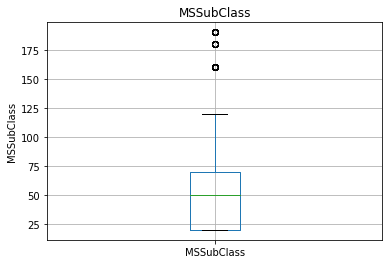

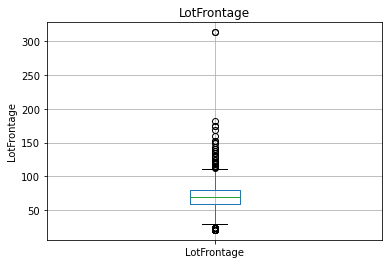

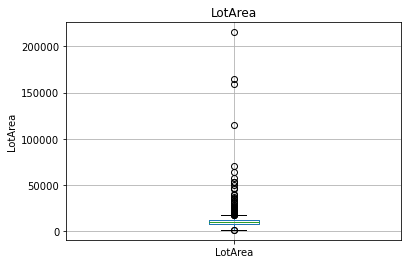

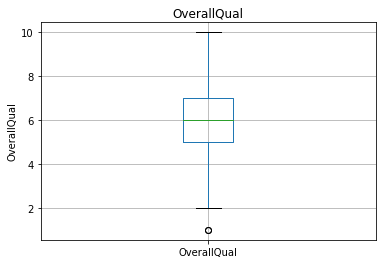

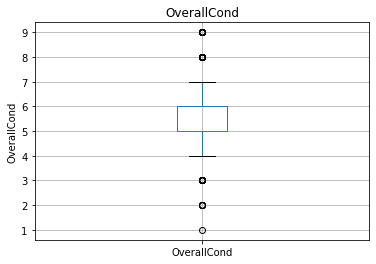

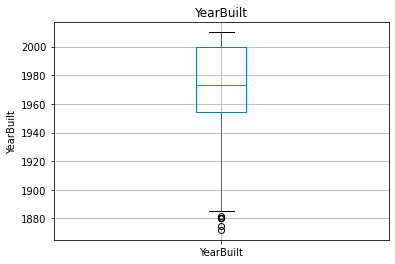

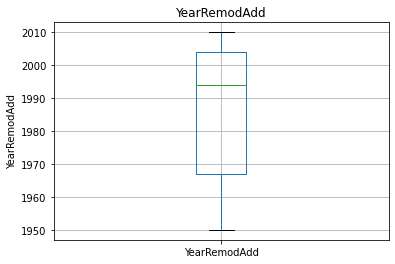

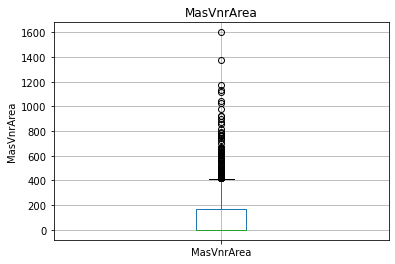

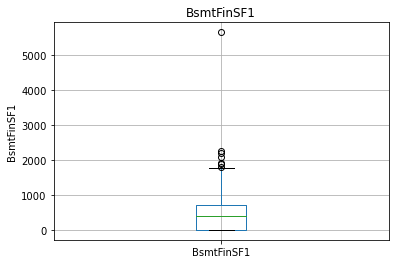

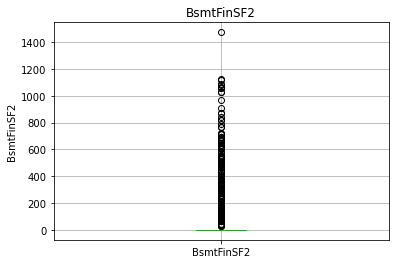

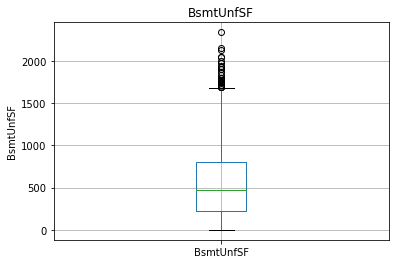

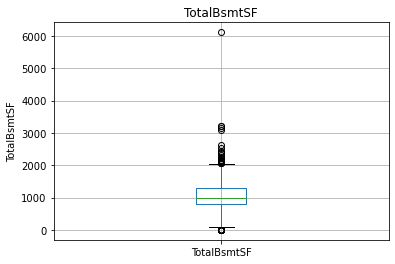

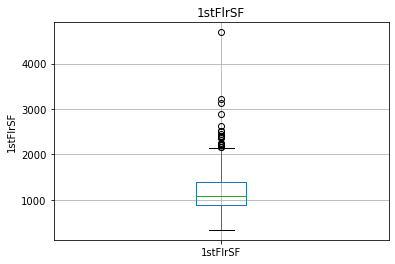

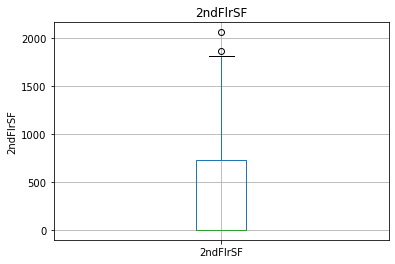

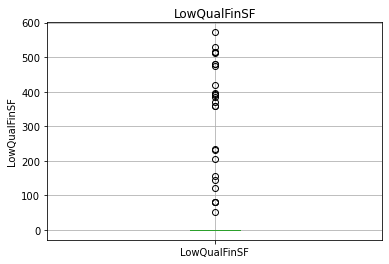

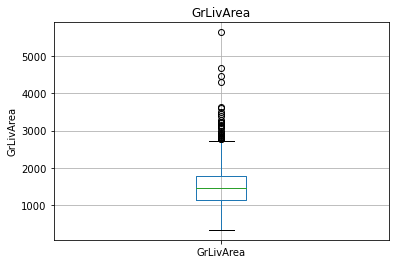

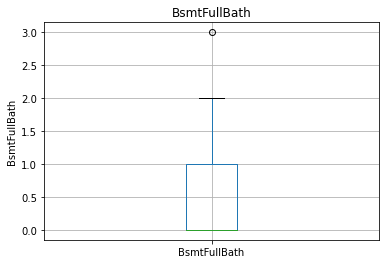

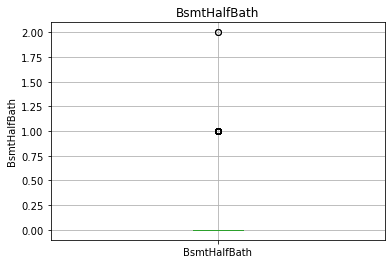

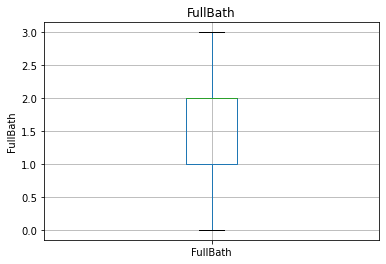

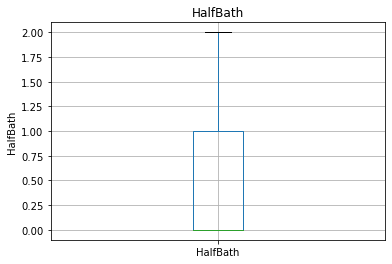

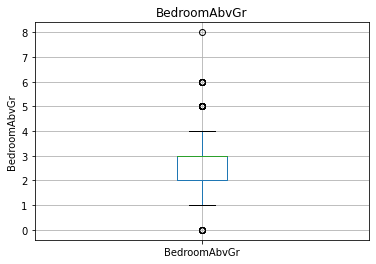

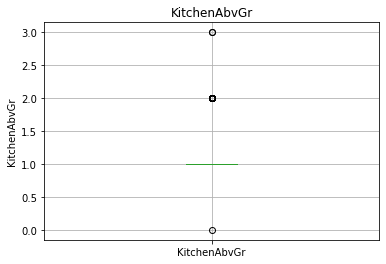

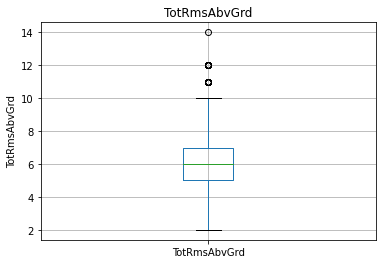

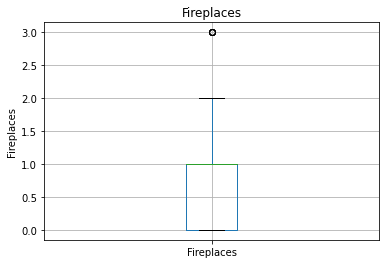

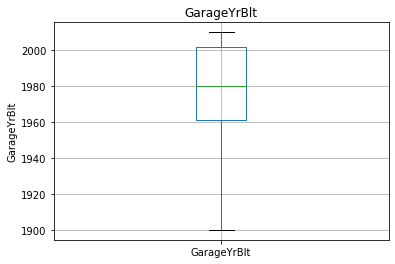

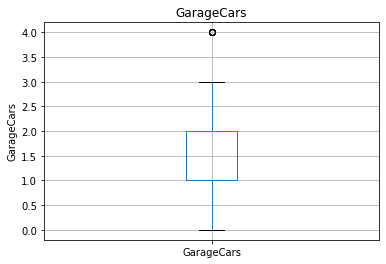

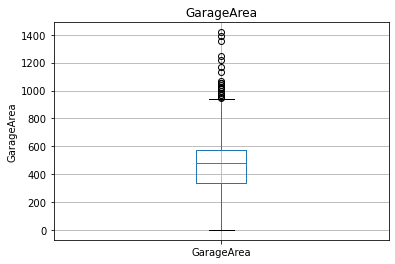

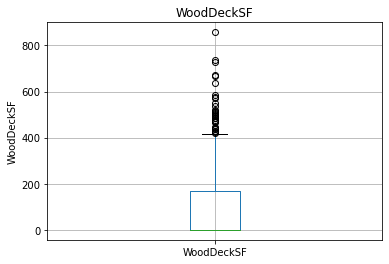

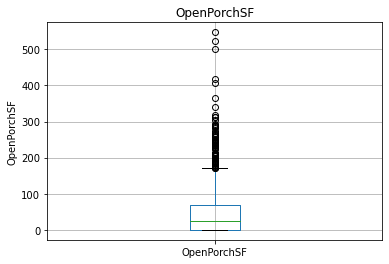

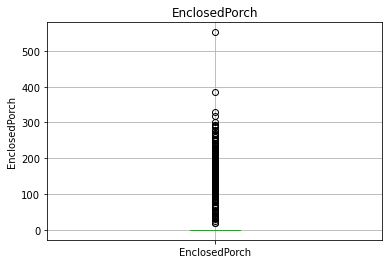

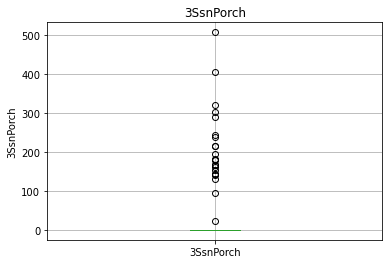

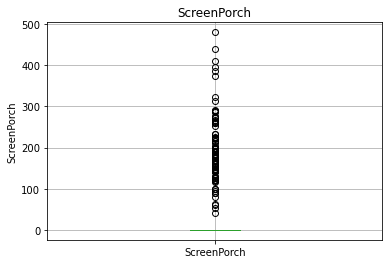

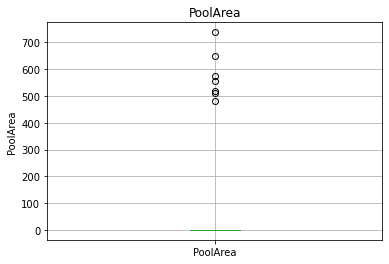

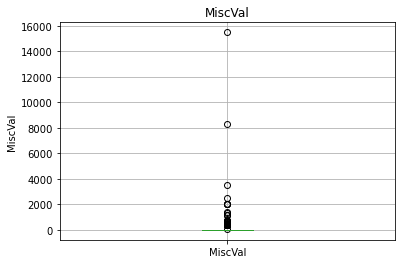

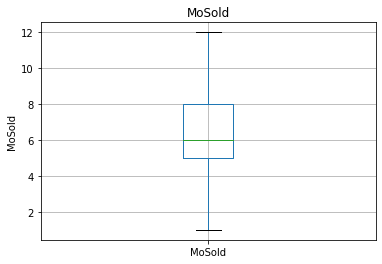

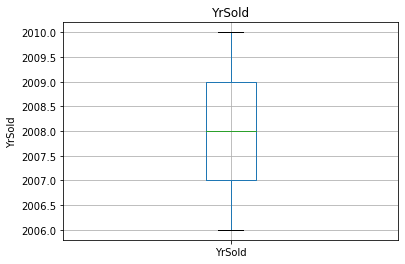

In [77]:
for feature in continous_var:
    data = df.copy()
    # data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [79]:
categorical_vars  = [feature for feature in df.columns if df[feature].dtypes =='O' ]
categorical_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [80]:
df[categorical_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [42]:
obj_data = df[['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']]

In [43]:
obj_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [5]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Conclusion of Reading & understanding the data.

Shape of dataset: 1460 records(rows) & 81 columns.

There are 18 columns in the data set having null values & we have created a separate list of all null values columns.
There are 5 such columns which have huge amount of null values. Some of them having more than 90% of data are null values.
There are 43 column's data type is object data type we have created a list of all object data type columns.
36 column's data type is integer data type. List was created for integer data type columns.

First task: Treating the missing values. First we will try to fill out the null values in all the columns. It is difficult to fill more than 90% of null values in any column, for those column first we will analyze the data it's relation with any other column, if we will be able to find any solution to fill the null values than we will fill the values by appropriate method & if not so we will remove the column from the data set.



## Finding Null Values

In [50]:
features_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### 1) Null values for LotFrontage

In [67]:
df['LotFrontage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [69]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [53]:
df['LotFrontage'].isnull().sum()

259

<Figure size 1440x864 with 0 Axes>

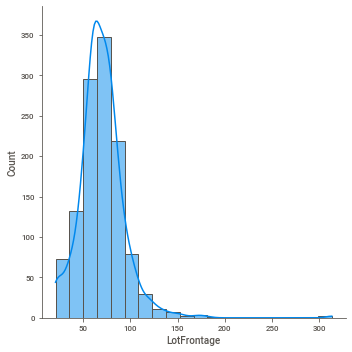

In [63]:
plt.figure(figsize=(20,12))
sns.displot(df['LotFrontage'],bins = 20, kde = True)

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

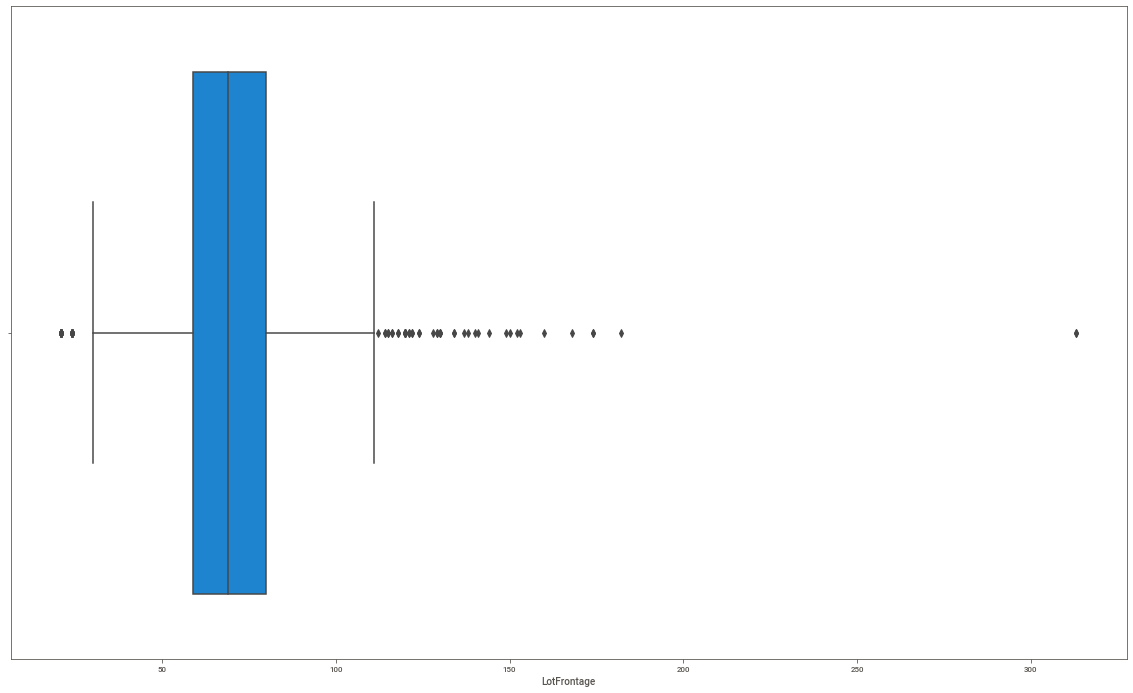

In [65]:
plt.figure(figsize=(20,12))
sns.boxplot(df['LotFrontage'])

#### LotFrontage is a continous column & its datatype is float64 but it does not have any decimal values so we will fill the NaN values with mean(rounding off) which is 70 in this case

In [70]:
## filling the null values for column[LotFrontage]

df['LotFrontage'] = df['LotFrontage'].fillna(70)

### 2) Null Values in MasVnrType

In [71]:
df['MasVnrType'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrType
Non-Null Count  Dtype 
--------------  ----- 
1452 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [75]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [83]:
df['MasVnrType'].isnull().sum()

8

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

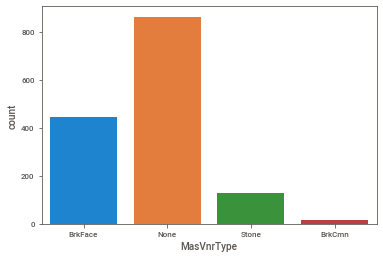

In [76]:
sns.countplot(df['MasVnrType'])

In [77]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [82]:
df['MasVnrArea'].isnull().sum()

8

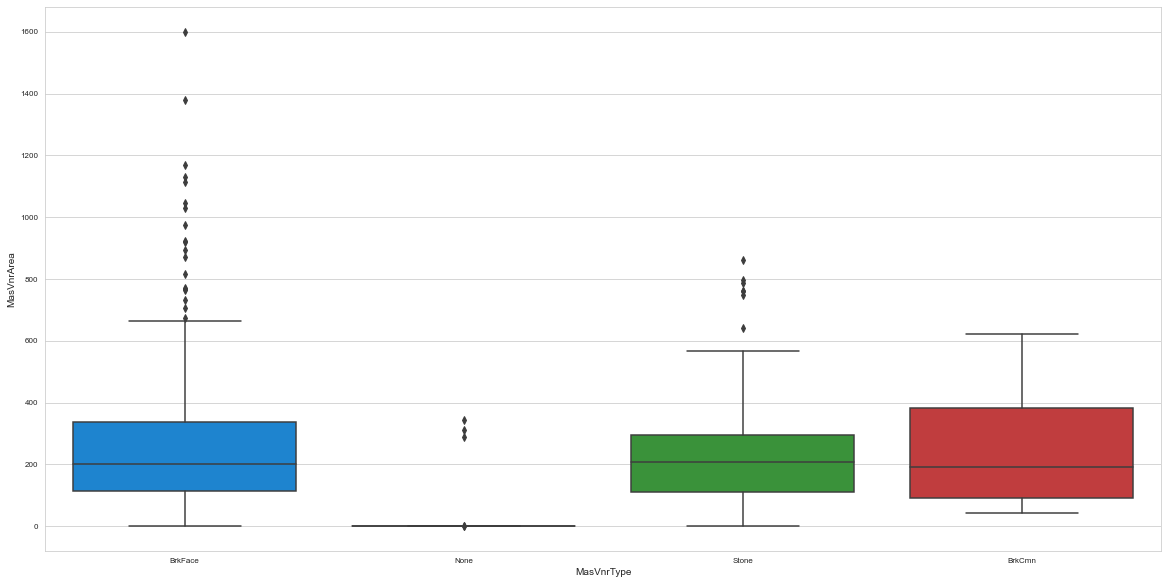

In [81]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.boxplot(x = 'MasVnrType', y = 'MasVnrArea', data = df)
plt.show()

From data analysis & visualization of **MasVnrType** & **MasVnrArea** we can analyze there is a relationship between both columns. **None** category of **MasVnrType** column holds the maximum amount of values of **MasVnrArea** column & that is **0**.
**BrkFace** holds the 2nd largest amount of values.
Defining a function where the null values in **MasVnrType** column, where if in the column **MasVnrArea** having value = 0 we will fill the null values in **MasVnrType** column as a category **None**, & if the value in **MasVnrArea** will be having other than **0** we will fill the null values in **MasVnrType** as a category **BrkFace**.

In [224]:
# defining a def function to fill the null values in MasVnrType with respect to it's relation with MasVnrArea column.
def fill_MasVnrType (col):
    MasVnrType = col[0]
    MasVnrArea = col[1]
    
    if pd.isnull(MasVnrType):
        if MasVnrArea == 0.0:
            return 'None'
        else:
            return 'BrkFace'
    else:
        return MasVnrType

In [226]:
# filling the null values in MasVnrType by above defined function.
df['MasVnrType'] = df[['MasVnrType', 'MasVnrArea']].apply(fill_MasVnrType, axis = 1)

In [228]:
# rechecking the null values
df['MasVnrType'].isnull().sum()

0

In [231]:
# rechecking the value counts of MasVnrType column
df['MasVnrType'].value_counts()

None       864
BrkFace    453
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

### Null Values for MasVnrArea

In [232]:
df['MasVnrArea'].isnull().sum()

8

null values have been filled with category **BrkFace** as earlier it has counts of 445 & now the count is 453.

We are going to fill the null values in MasVnrArea in the same way of using the relationship of both the column used above.

In [233]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [235]:
def fill_MasVnrArea (col):
    MasVnrArea = col[0]
    MasVnrType = col[1]
    
    if pd.isnull(MasVnrArea):
        if MasVnrType == 'None':
            return 0                   # returning 0 because None category of MasVnrType having almost all MasVnrArea value as 0
        elif MasVnrType == 'BrkFace':
            return 203                 # returing 203 because mean value of MasVnrArea in BrkFace category is 203, considered.
        elif MasVnrType == 'Stone':
            return 207                 # returning 207 because mean value of MasVnrArea in Stone category is 207, considered.
        else:
            return 193                 # returning 193 because mean value of MasVnrArea in Brkcmn category is 193, considered.
    else:
        return MasVnrArea              # returning same values as it is where there is no null values in MasVnrArea column.

In [236]:
# filling & recheking the null values in MasVnrType by above defined function.
df['MasVnrArea'] = df[['MasVnrArea', 'MasVnrType']].apply(fill_MasVnrArea, axis = 1)
df['MasVnrArea'].isnull().sum()

0

### 3) Null Values in BsmtQual

In [84]:
print(features_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [85]:
df['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [87]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

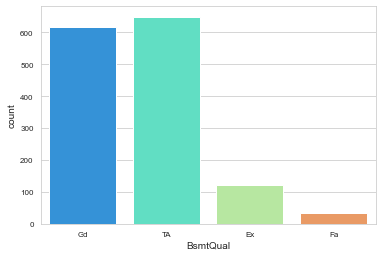

In [88]:
sns.countplot(df['BsmtQual'], palette = 'rainbow')

In [89]:
df['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [90]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

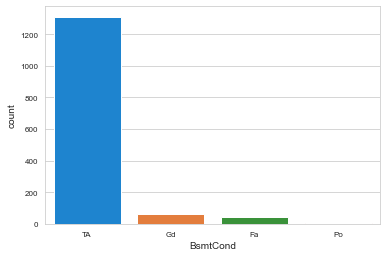

In [92]:
sns.countplot(df['BsmtCond'])

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

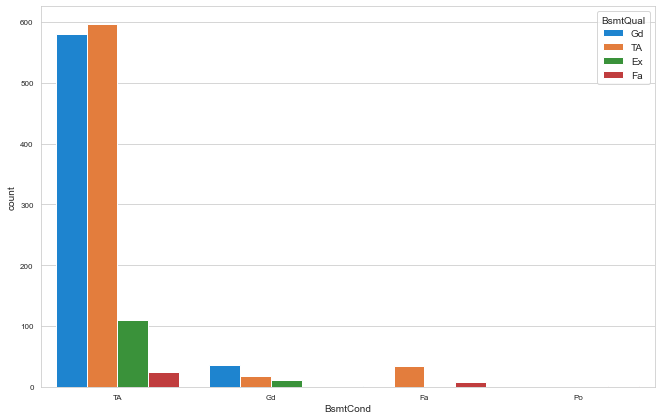

In [94]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtCond', hue = 'BsmtQual',data = df)

In [96]:
df['BsmtExposure'].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [97]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

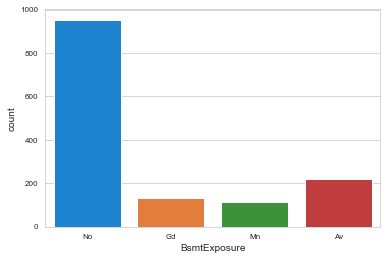

In [98]:
sns.countplot(df['BsmtExposure'])

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

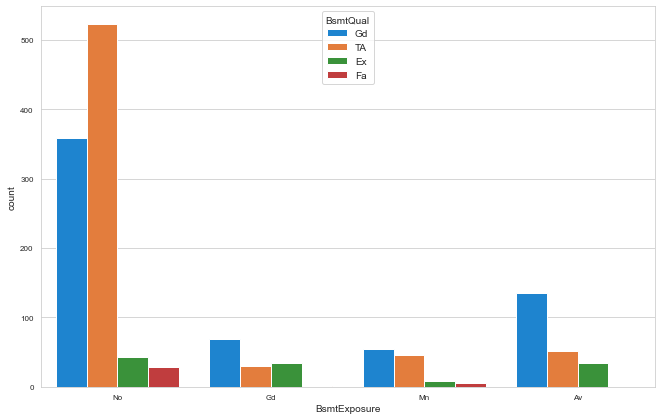

In [99]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtExposure', hue = 'BsmtQual',data = df)

In [101]:
df['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [102]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

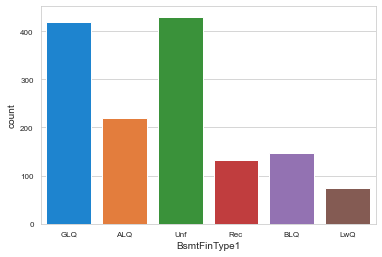

In [103]:
sns.countplot(df['BsmtFinType1'])

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

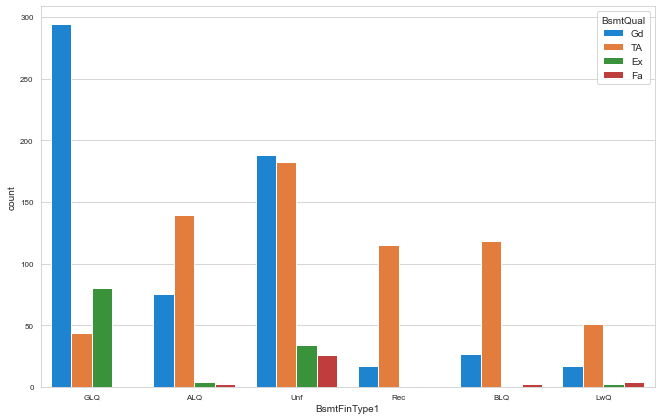

In [104]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType1', hue = 'BsmtQual',data = df)

In [106]:
df['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [107]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

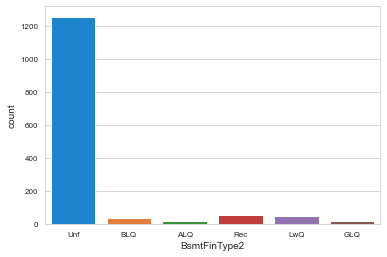

In [109]:
sns.countplot(df['BsmtFinType2'])

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

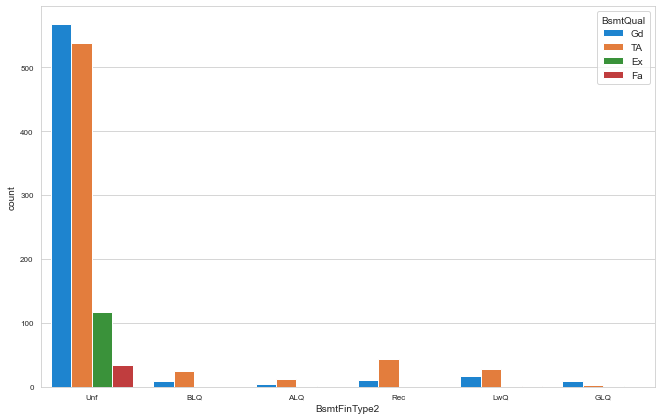

In [111]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType2', hue = 'BsmtQual',data = df)

From above analysis and visualization of all Basement reated column we analyzed the interrelation of BsmntQual column with all other Basement related column. From the analysis we understand the relation between **BsmntQual** & **BsmntFinType1** column the most. So using BsmntFinType1 column to fill Null values in BsmnQual column.

In [115]:
def fill_BsmntQual (col):
    BsmtQual = col[0]
    BsmtFinType1 = col[1]
    
    if pd.isnull(BsmtQual):
        if BsmtFinType1 == 'ALQ':
            return 'TA'
        elif BsmtFinType1 == 'GLQ':
            return 'Gd'
        elif BsmtFinType1 == 'BLQ':
            return 'TA'
        elif BsmtFinType1 == 'Unf':
            return 'Gd'
        elif BsmtFinType1 == 'Rec':
            return 'TA'
        else:
            return 'TA'
    else:
        return BsmtQual

In [118]:
df['BsmtQual'] = df[['BsmtQual', 'BsmtFinType1']].apply(fill_BsmntQual, axis = 1)

In [119]:
df['BsmtQual'].isnull().sum()

0

### 4) Null Values in BsmtCond

In [121]:
# checking the description of the column
df['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [122]:
# checking the counts of categories of the column
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

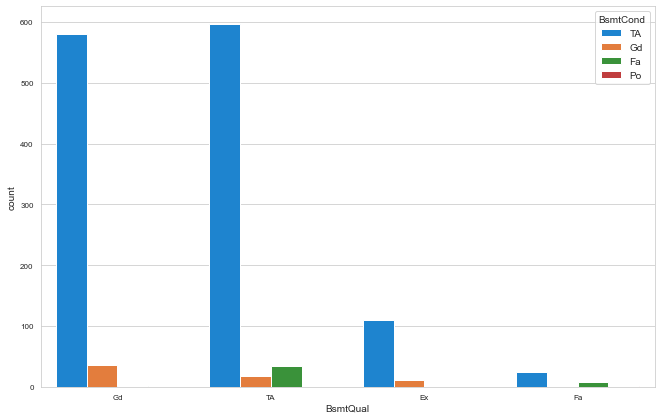

In [123]:
# countplot of column BsmtCond & BsmtQual
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtQual', hue = 'BsmtCond',data = df)

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

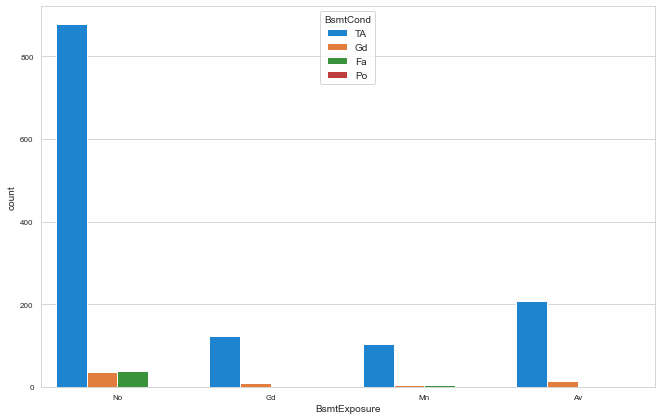

In [124]:
# countplot of column BsmtCond & BsmtExposure
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtExposure', hue = 'BsmtCond',data = df)

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

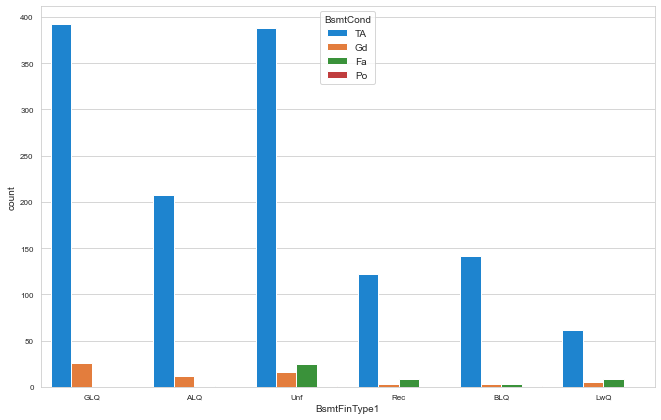

In [125]:
# countplot of column BsmtCond & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType1', hue = 'BsmtCond',data = df)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

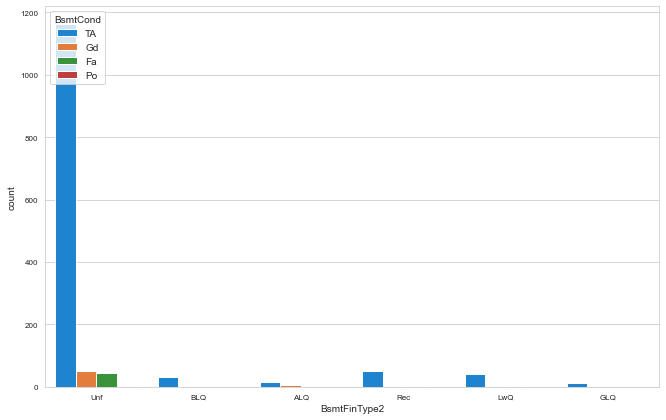

In [126]:
# countplot of column BsmtCond & BsmtFinType2
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType2', hue = 'BsmtCond',data = df)

**TA** category in **BsmtCond** has the maximum occurence corrospond every categories in every other Basement related column. Filling **TA** in place of null values

In [137]:
# filling the null values
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [129]:
# rechecking the sum of null values in column
df['BsmtCond'].isnull().sum()

0

### 5) Null Values in BsmtExposure

In [130]:
# checking the description of the column
df['BsmtExposure'].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [131]:
# checking the counts of the values in the column
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

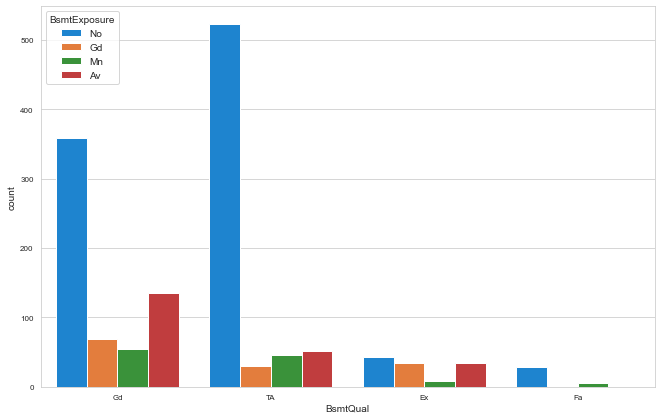

In [132]:
# countplot of column BsmtExposure & BsmtQual
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtQual', hue = 'BsmtExposure',data = df)

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

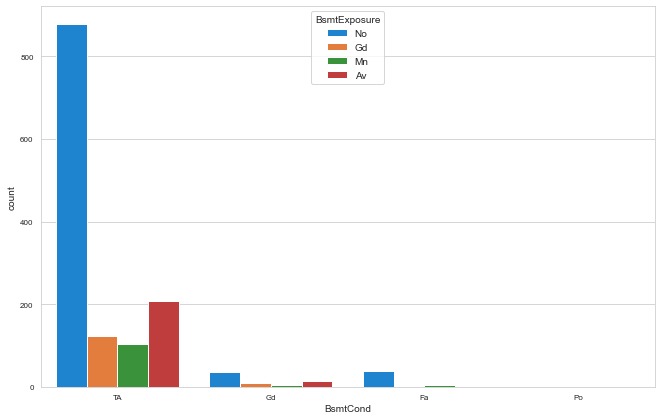

In [133]:
# countplot of column BsmtExposure & BsmtCond
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtCond', hue = 'BsmtExposure',data = df)

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

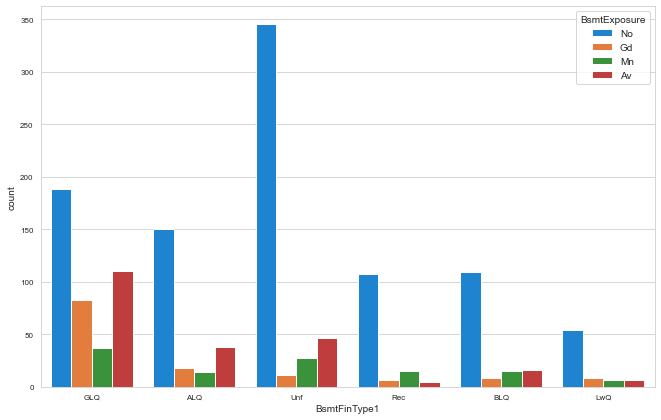

In [134]:
# countplot of column BsmtExposure & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType1', hue = 'BsmtExposure',data = df)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

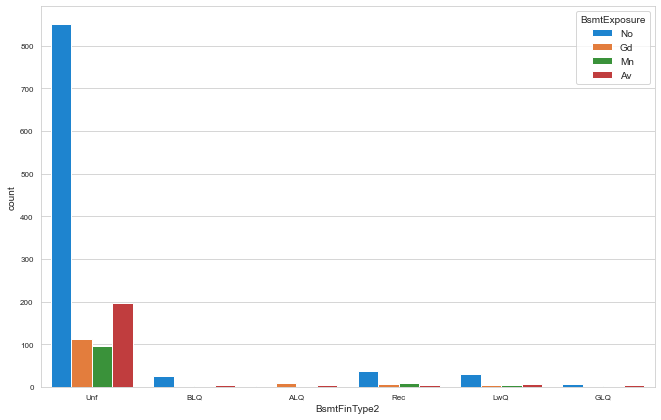

In [135]:
# countplot of column BsmtExposure & BsmtFinType2
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType2', hue = 'BsmtExposure',data = df)

**NO** category in **BsmtExposure** has the maximum occurence corrospond every categories in every other Basement related column. Filling **NO** in place of null values

In [136]:
# filling the null values
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [138]:
# rechecking the sum of null values in the column
df['BsmtExposure'].isnull().sum()

0

### 6) Null Values in BsmtFinType1

In [139]:
# checking the description of BsmtFinType1 column
df['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [140]:
# checking the counts of values in BsmtFinType1 column 
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

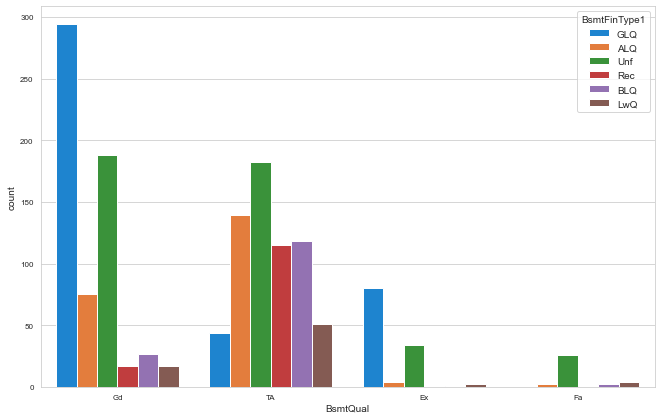

In [141]:
# countplot of column BsmtQual & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtQual', hue = 'BsmtFinType1',data = df)

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

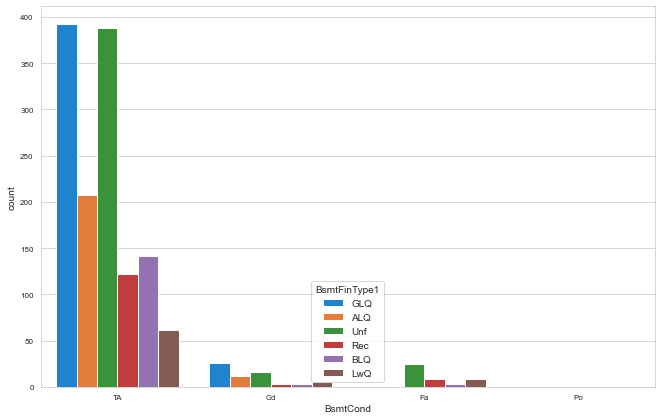

In [142]:
# countplot of column BsmtQual & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtCond', hue = 'BsmtFinType1',data = df)

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

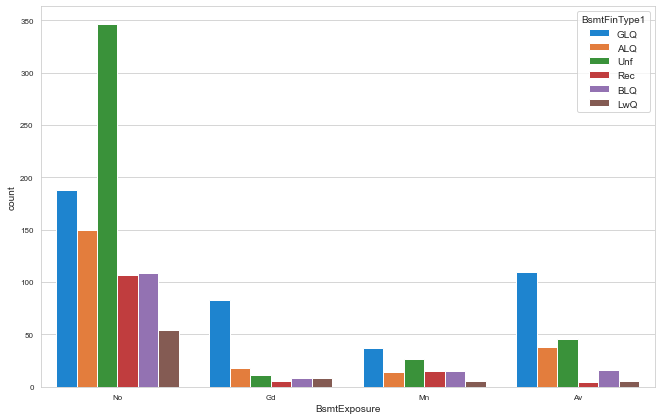

In [143]:
# countplot of column BsmtQual & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtExposure', hue = 'BsmtFinType1',data = df)

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

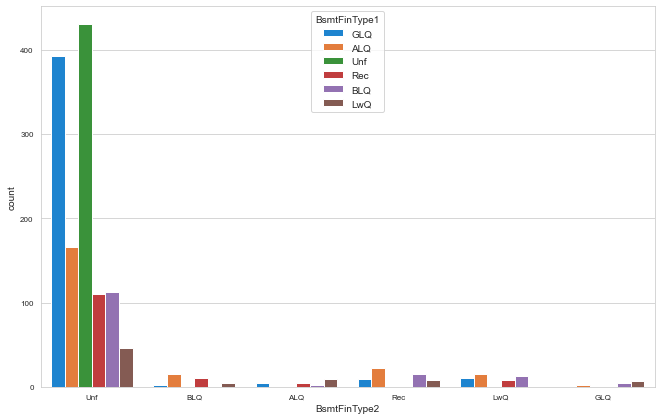

In [144]:
# countplot of column BsmtQual & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType2', hue = 'BsmtFinType1',data = df)

### 7) Null Values in BsmtFinType2

In [145]:
# checking the description of BsmtFinType2 column
df['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [146]:
# checking the counts of each category of the column BsmtFinType2
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

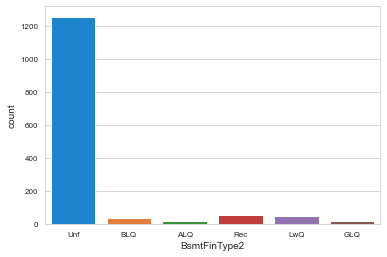

In [148]:
# plotting the countplot to visualize the distribution of the category on the column.
sns.countplot(df['BsmtFinType2'])

**Unf** category has the highest number of counts and it is one side biased column. Replacig the mean of the column with the mode of the column.

In [149]:
# filling the null values with mode of the column in BsmtFinType2
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [150]:
# rechecking the sum of null values if any after filling the null values in the column BsmtFinType2.
df['BsmtFinType2'].isnull().sum()

0

### 8) Null Values in Electrical.

In [156]:
df['Electrical'].isnull().sum()

1

In [151]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [152]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Electrical', ylabel='count'>

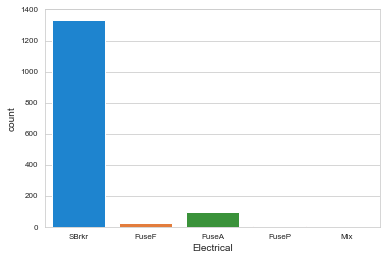

In [153]:
sns.countplot(df['Electrical'])

In [158]:
# filling with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [159]:
# rechecking null values
df['Electrical'].isnull().sum()

0

### 9) Null Values in FireplaceQu

In [162]:
df['FireplaceQu'].isnull().sum()

690

In [160]:
df['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [161]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

/Users/dipikamundhra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

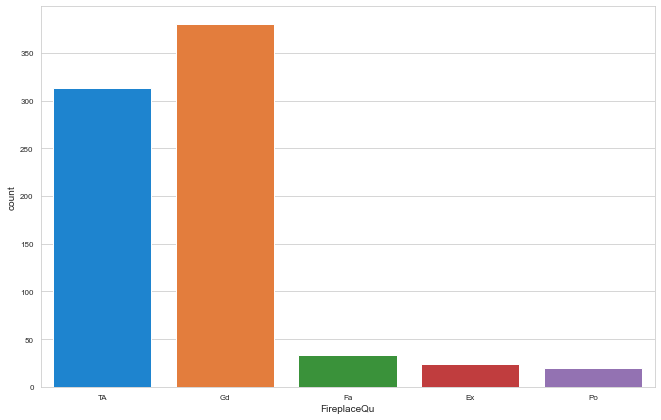

In [165]:
plt.figure(figsize = (11,7))
sns.countplot(df['FireplaceQu'])

**FireplaceQu** & **KitchenQual** has a relation as they have same inputs in there column

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

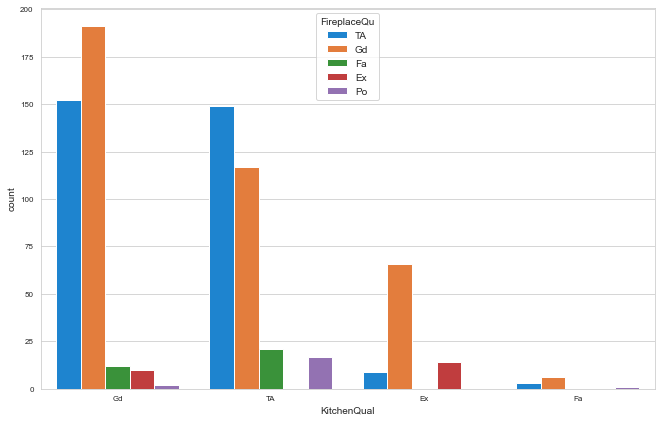

In [168]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'KitchenQual', hue = 'FireplaceQu', data = df)

In [169]:
def fill_FireplaceQu (col):
    FireplaceQu = col[0]
    KitchenQual = col[1]
    
    if pd.isnull(FireplaceQu):
        if KitchenQual == 'TA':
            return 'TA'
        elif KitchenQual == 'Gd':
            return 'Gd'
        elif KitchenQual == 'Ex':
            return 'Ex'
        elif KitchenQual == 'Fa':
            return 'Po'
        else:
            return 'Fa'
    else:
        return FireplaceQu  

In [171]:
# filling null values
df['FireplaceQu'] = df[['FireplaceQu', 'KitchenQual']].apply(fill_FireplaceQu, axis = 1)

In [172]:
# recheking null values
df['FireplaceQu'].isnull().sum()

0

### 10) Null Values in GarageType

In [173]:
df['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [174]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [175]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='count'>

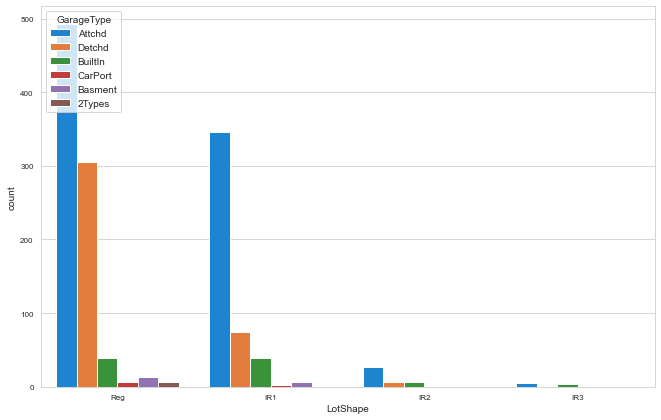

In [177]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'LotShape', hue = 'GarageType', data = df)

In [178]:
def fill_GarageType (col):
    GarageType = col[0]
    LotShape = col[1]
    
    if pd.isnull(GarageType):
        if LotShape == 'IR1':
            return 'Attchd'
        elif LotShape == 'Reg':
            return 'Detchd'
        elif LotShape == 'IR2':
            return 'Attchd'
        elif LotShape == 'IR3':
            return 'BuiltIn'
    else:
        return GarageType

In [180]:
# filling null values
df['GarageType'] = df[['GarageType', 'LotShape']].apply(fill_GarageType, axis = 1)

In [181]:
# rechecking null values
df['GarageType'].isnull().sum()

0

### 11) Null Values in GarageYrBlt

In [182]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [183]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='GarageYrBlt'>

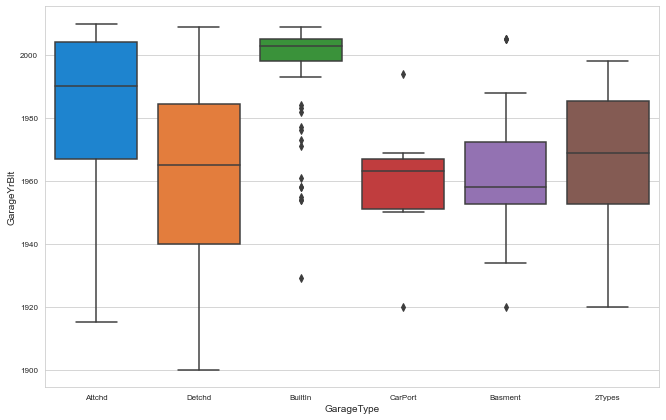

In [184]:
plt.figure(figsize = (11,7))
sns.boxplot(x = 'GarageType', y = 'GarageYrBlt', data = df)

filling with the mean of each category type

In [185]:
def fill_GarageYrBlt (col):
    GarageYrBlt = col[0]
    GarageType = col[1]
    
    if pd.isnull(GarageYrBlt):
        if GarageType == 'Attchd':
            return 1990
        elif GarageType == 'BuiltIn':
            return 2003
        elif GarageType == 'Detchd':
            return 1965
        elif GarageType == 'Basment':
            return 1958
        elif GarageType == '2Types':
            return 1969
        else:
            return 1963
    else:
        return GarageYrBlt

In [186]:
# filling null values
df['GarageYrBlt'] = df[['GarageYrBlt', 'GarageType']].apply(fill_GarageYrBlt, axis = 1)

In [187]:
# rechecming null values
df['GarageYrBlt'].isnull().sum()

0

### 12) Null Values in GarageFinish

In [188]:
df['GarageFinish'].describe()

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

In [189]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

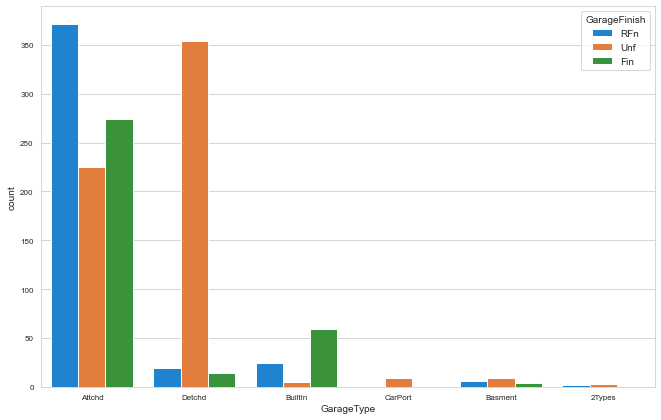

In [190]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'GarageType', hue = 'GarageFinish', data = df)

In [191]:
def fill_GarageFinish (col):
    GarageFinish = col[0]
    GarageType = col[1]
    
    if pd.isnull(GarageFinish):
        if GarageType == 'Attchd':
            return 'RFn'
        elif GarageType == 'BuiltIn':
            return "Fin"
        elif GarageType == 'Detchd':
            return 'Unf'
        elif GarageType == 'Basment':
            return 'Unf'
        elif Garagetype == '2Types':
            return 'Unf'
        else:
            return 'Unf'
        
    else:
        return GarageFinish

In [193]:
# filling & rechecking null values
df['GarageFinish'] = df[['GarageFinish', 'GarageType']].apply(fill_GarageFinish, axis = 1)
df['GarageFinish'].isnull().sum()

0

### 13) Null Values in GarageQual

In [194]:
df['GarageQual'].describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

In [195]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

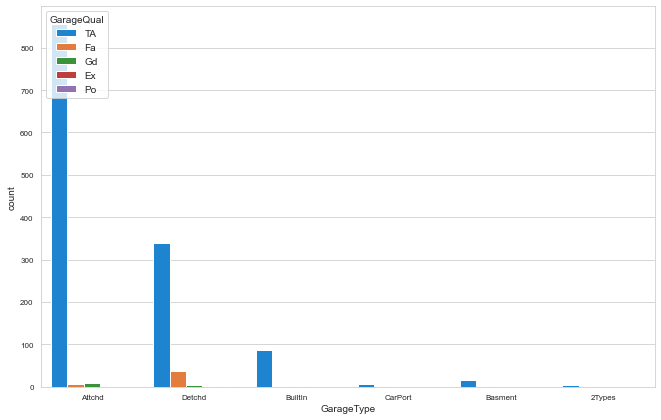

In [196]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'GarageType', hue = 'GarageQual', data = df)

In [197]:
def fill_GarageQual (col):
    GarageQual = col[0]
    GarageType = col[1]
    
    if pd.isnull(GarageQual):
        if GarageType == 'Detchd':
            return 'TA'
    else:
        return GarageQual

In [198]:
## filling & rechecking null values
df['GarageQual'] = df[['GarageQual', 'GarageType']].apply(fill_GarageQual, axis = 1)
df['GarageQual'].isnull().sum()

17

### 14) Null Values in GarageCond

In [201]:
df['GarageCond'].isnull().sum()

81

In [199]:
df['GarageCond'].describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

In [200]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

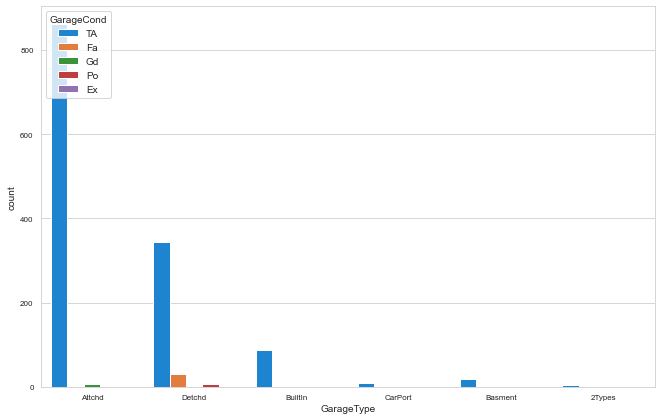

In [202]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'GarageType', hue = 'GarageCond', data = df)

In [203]:
def fill_GarageCond (col):
    GarageCond = col[0]
    GarageType = col[1]
    
    if pd.isnull(GarageCond):
        if GarageType == 'Detchd':
            return "Fa"
        else:
            return 'TA'
    else:
        return GarageCond

In [204]:
## filling & rechecking null values
df['GarageCond'] = df[['GarageCond', 'GarageType']].apply(fill_GarageCond, axis = 1)
df['GarageCond'].isnull().sum()

0

In above analyzation we found that the presence of TA category of column **GarageCond** has in each category of **GarageType** in highest counts but the presence of **Fa** category is in majority in **Detchd** category of column **GarageType**, hence we filled the null values with category **Fa** if the correspond value of **GarageType** would be **Detchd** else we filled the null values with **Ta** category.

### 15) Null Values in PoolQC

In [205]:
df['PoolQC'].describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [206]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

99.52% of the data in the column is null values hence it is better to drop this column.

### 16) Null Values in Fence

In [210]:
df['Fence'].isnull().sum()

1179

In [207]:
df['Fence'].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [208]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

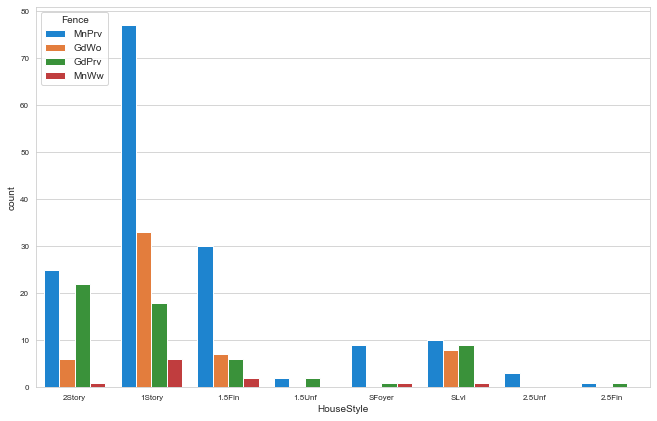

In [209]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'HouseStyle', hue = 'Fence', data = df)

In [211]:
def fill_Fence (col):
    Fence = col[0]
    HouseStyle = col[1]
    
    if pd.isnull(Fence):
        if HouseStyle == '1Story':
            return 'MnPrv'
        elif HouseStyle == '2Story':
            return 'GdPrv'
        elif HouseStyle == '1.5Fin':
            return 'GdWo'
        elif HouseStyle == 'SFoyer':
            return 'MnWw'
        elif HouseStyle == '1.5Unf':
            return 'GdPrv'
        elif HouseStyle == 'Slvl':
            return 'GdWo'
        elif HouseStyle == '2.5Fin':
            return 'GdPrv'
        else:
            return 'MnPrv'
    else:
        return Fence

Defined a function for various categories of **Fence** related to **HomeStyle**. This column has around 80% null values, if all the values were filled with **MnPrv** then that might increase biasness towards one category in the column

In [212]:
## filling & rechecking null values
df['Fence'] = df[['Fence', 'HouseStyle']].apply(fill_Fence, axis = 1)
df['Fence'].isnull().sum()

0

### 19) Null Values in MiscFeature

In [213]:
df['MiscFeature'].describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

In [214]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

Column has 96.3% data missing, so we are not going to fill the null values in this column rather we will drop the column from the data.

### 18) Null Values in Alley

In [215]:
df['Alley'].isnull().sum()

1369

In [216]:
df['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [217]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

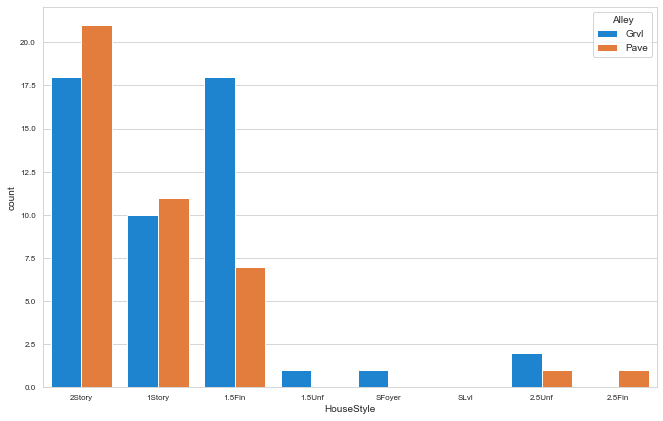

In [218]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'HouseStyle', hue = 'Alley', data = df)

In [219]:
def fill_Alley (col):
    Alley = col[0]
    HouseStyle = col[1]
    
    if pd.isnull(Alley):
        if HouseStyle == '1Story':
            return 'Pave'
        elif HouseStyle == '2Story':
            return 'Grvl'
        elif HouseStyle == '1.5Fin':
            return 'Grvl'
        elif HouseStyle == 'SFoyer':
            return 'Grvl'
        elif HouseStyle == '1.5Unf':
            return 'Grvl'
        elif HouseStyle == 'Slvl':
            return 'NA'
        elif HouseStyle == '2.5Fin':
            return 'Pave'
        else:
            return 'Grvl'
    else:
        return Alley

In [223]:
## filling & rechecking null values
df['Alley'] = df[['Alley', 'HouseStyle']].apply(fill_Alley, axis = 1)
df['Alley'].isnull().sum()

0

#### All null values filled

In [238]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

## Dropping The Columns We Don't Require

In [239]:
df = df.drop(columns = ['PoolQC', 'MiscFeature'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,GdPrv,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,MnPrv,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,GdPrv,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,GdPrv,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,GdPrv,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,GdPrv,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,MnPrv,0,4,2010,WD,Normal


# Visualisation

In [244]:
# making a list of integer data type columns and getting the lentgh of all integer data type columns.

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  36


In [245]:
# making a list of integer data type columns and getting the lentgh of all float data type columns.

float_features = [feature for feature in df.columns if df[feature].dtypes == 'float']
print('Number of float variables: ', len(float_features))

Number of float variables:  3


#### appending both lists

In [246]:
cont_col = []
for i in numerical_features:
    cont_col.append(i)
for j in float_features:
    cont_col.append(j)
    
print(cont_col)
print(len(cont_col))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
39


## Plotting the distribution plot for all continuous column with for loop


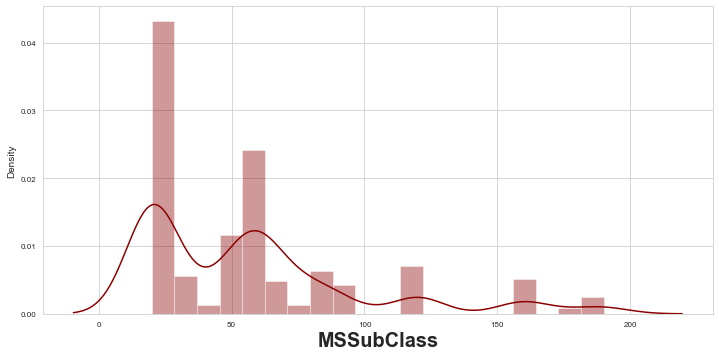

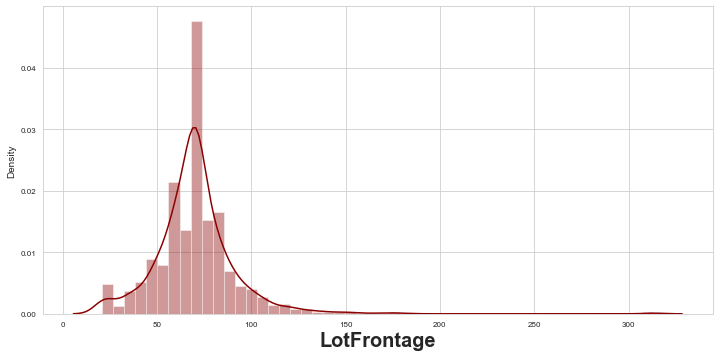

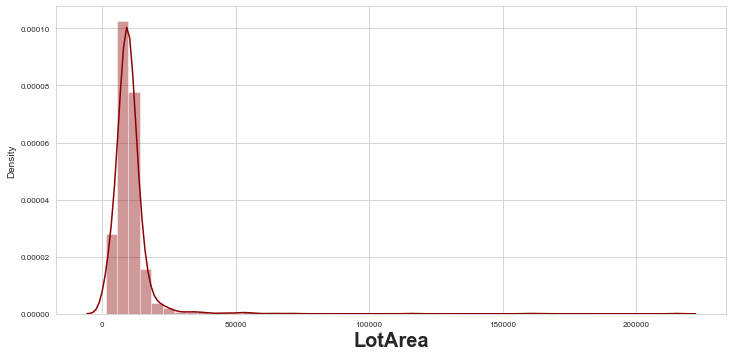

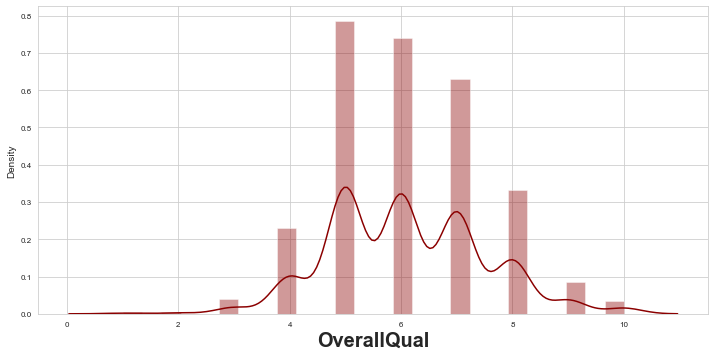

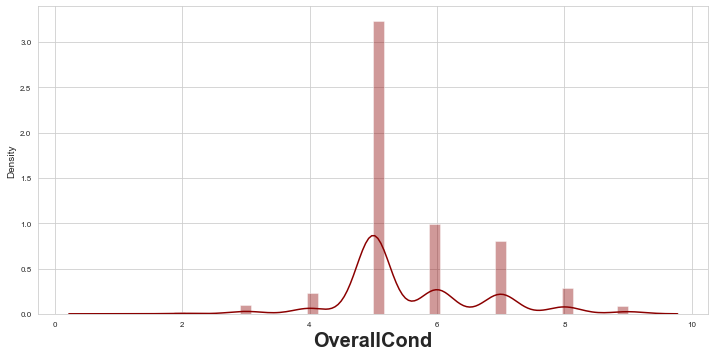

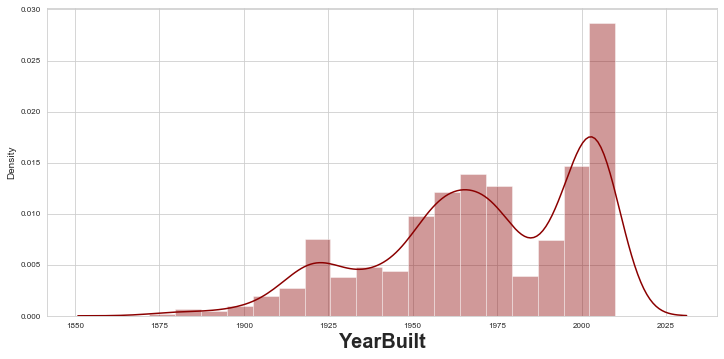

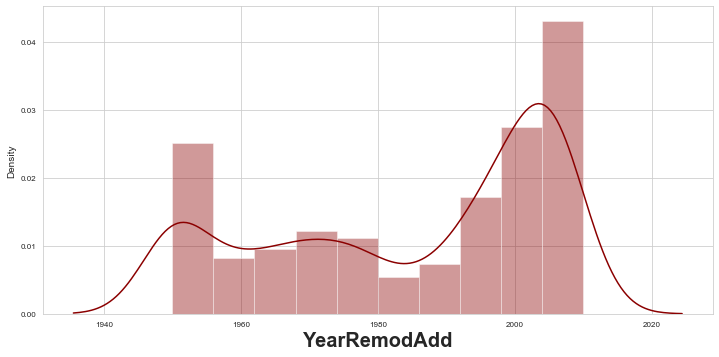

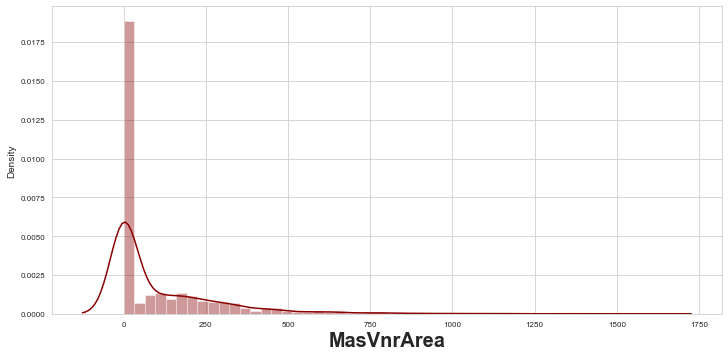

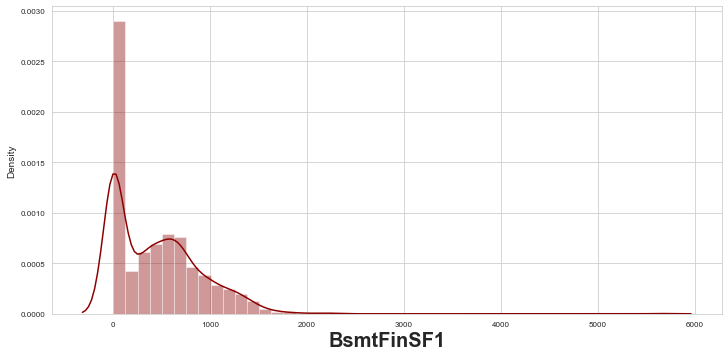

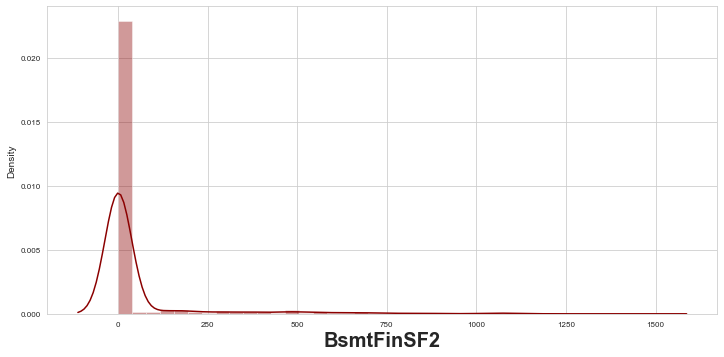

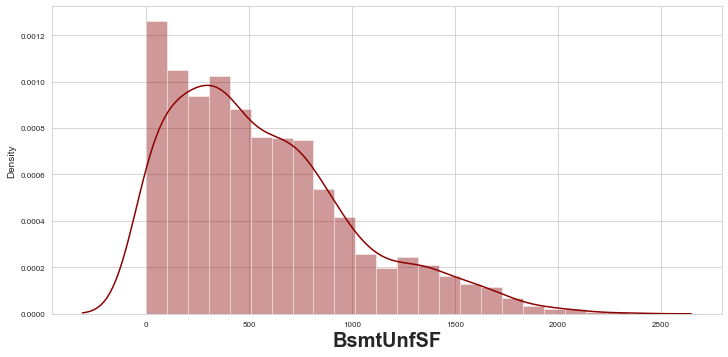

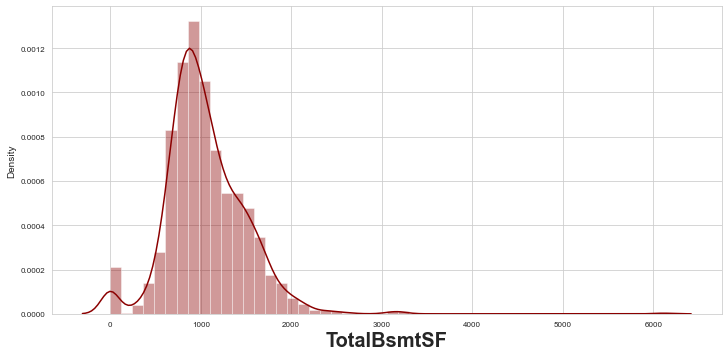

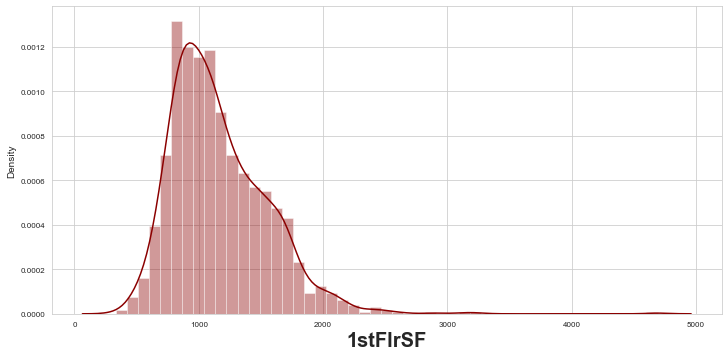

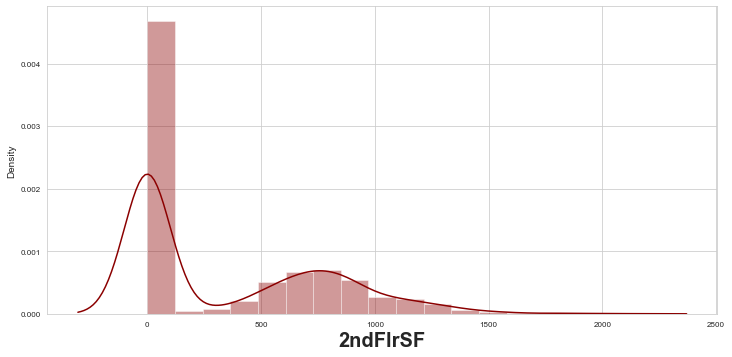

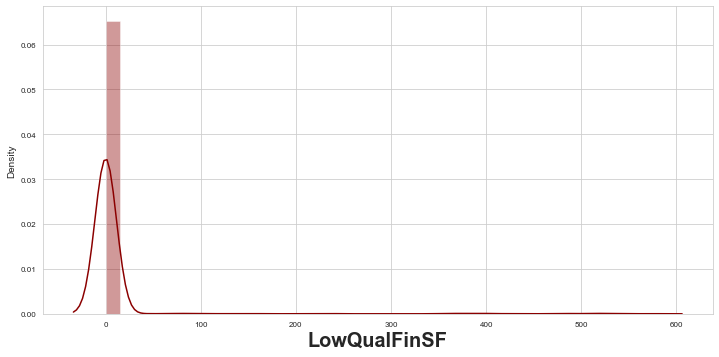

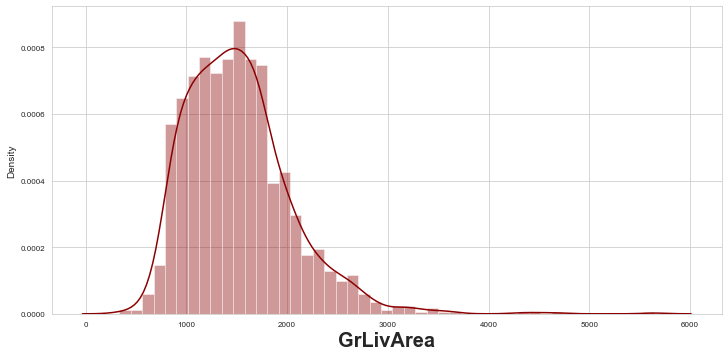

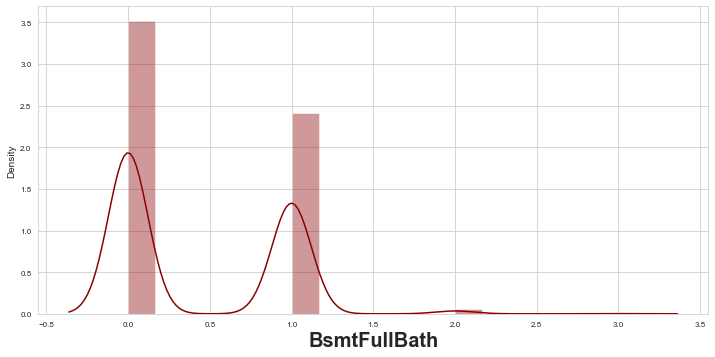

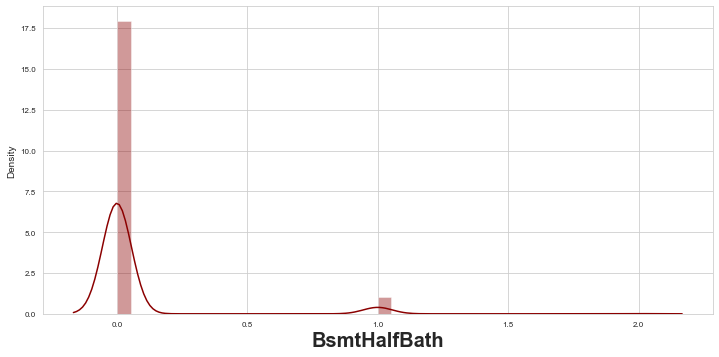

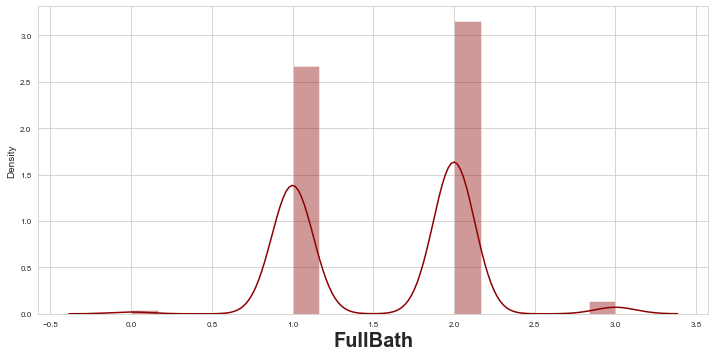

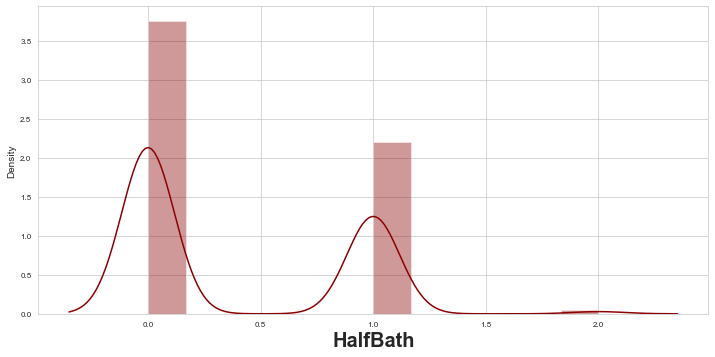

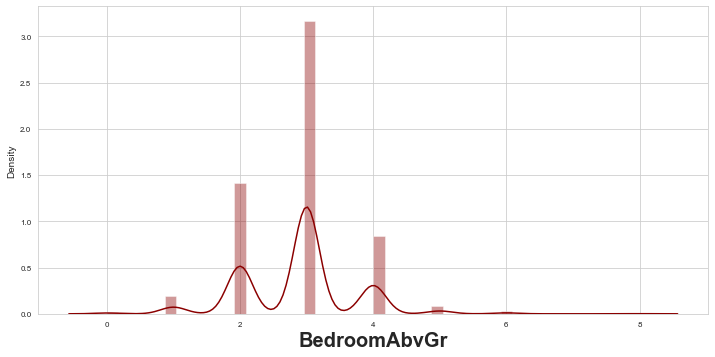

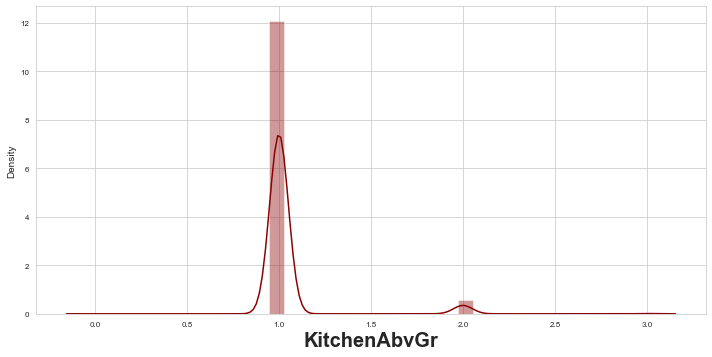

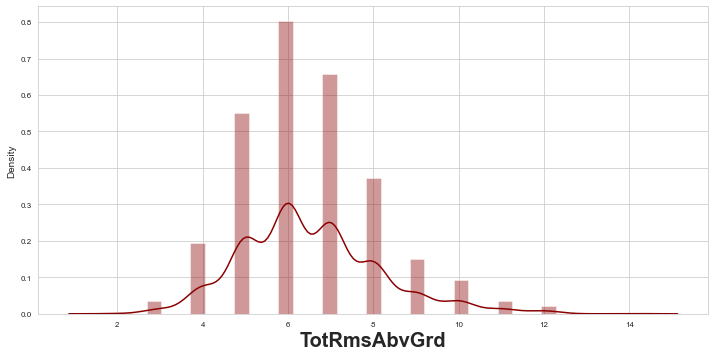

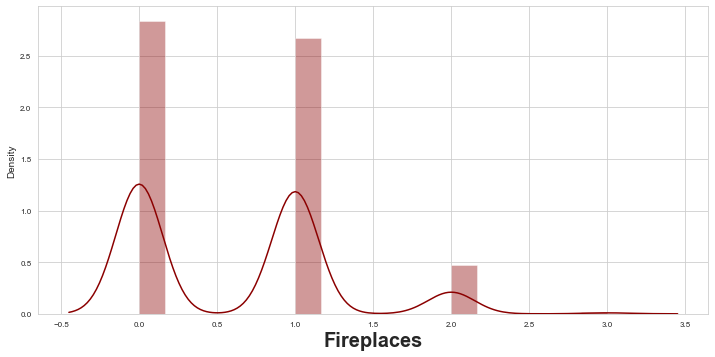

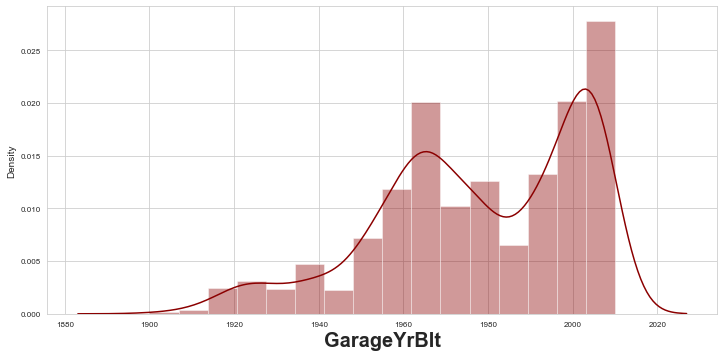

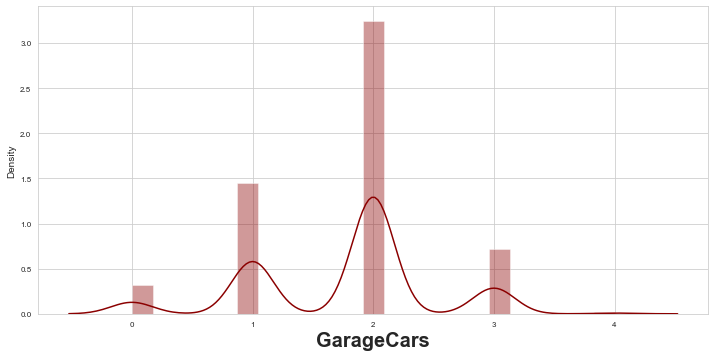

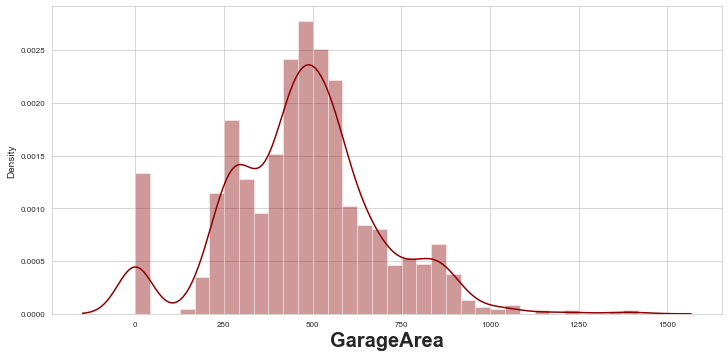

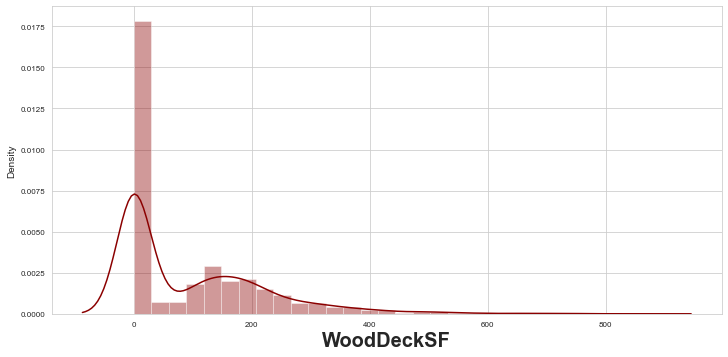

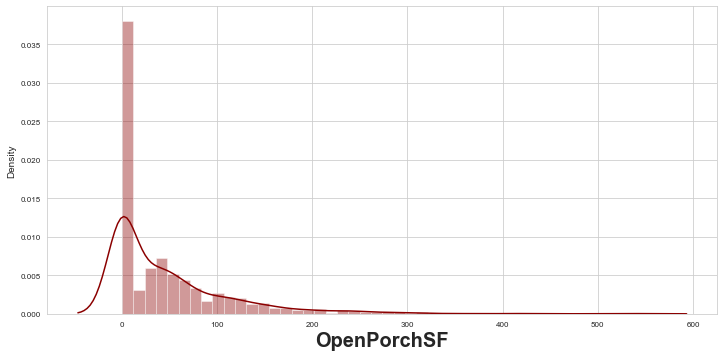

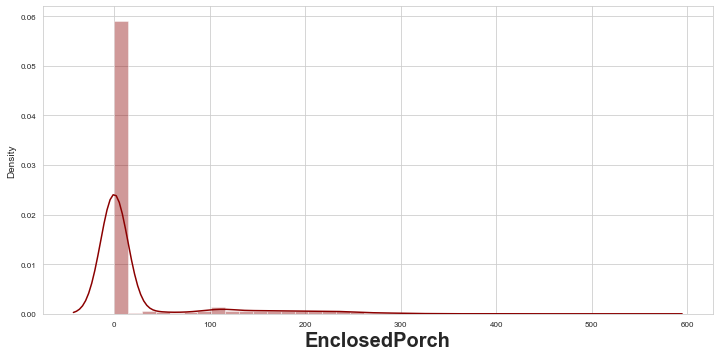

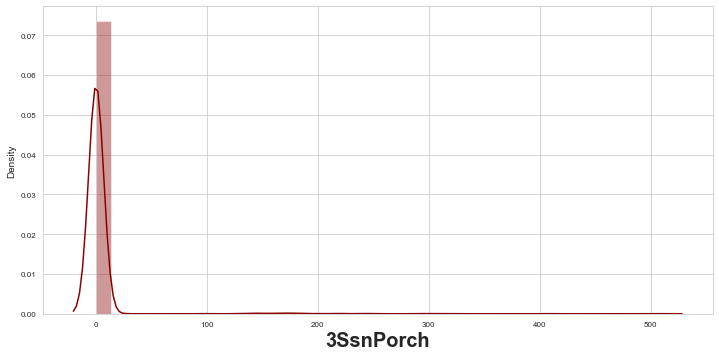

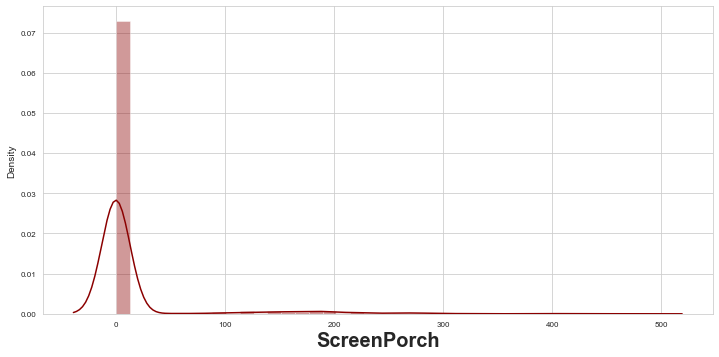

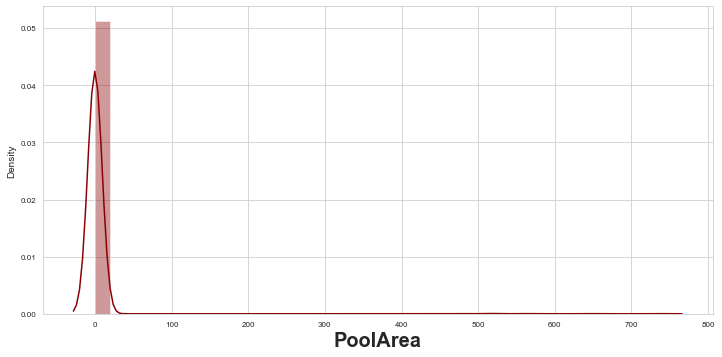

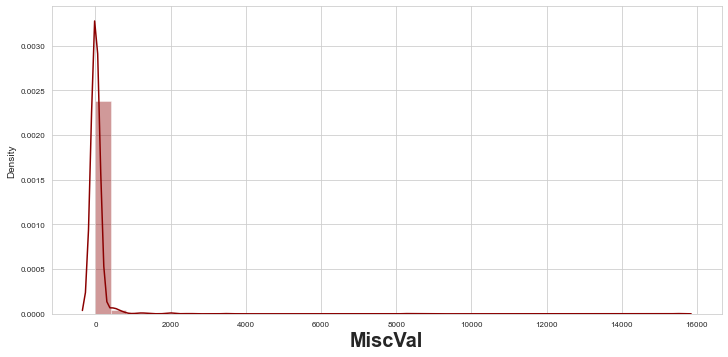

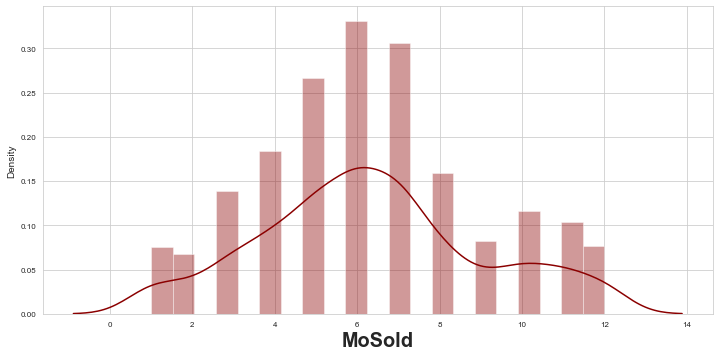

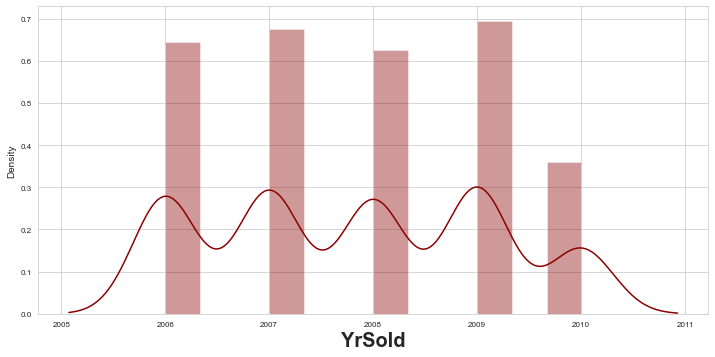

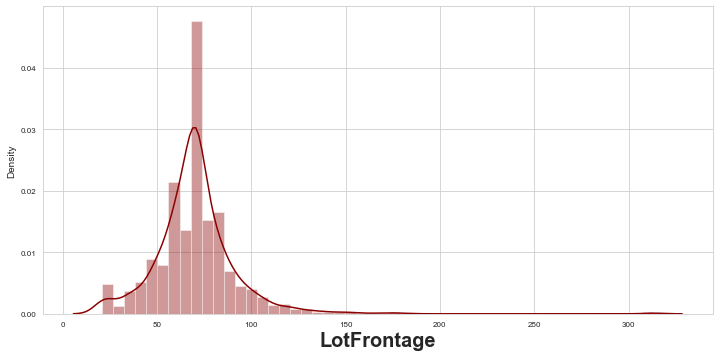

In [250]:
plotnumber = 1

for columns in cont_col:
    if plotnumber <= 37:
        plt.figure(figsize = (12,250))
        ax = plt.subplot(37,1, plotnumber)
        sns.distplot(df[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20, fontweight = 'bold')
        plotnumber+=1
plt.show()

## Plotting the boxplots for all continuous column with for loop

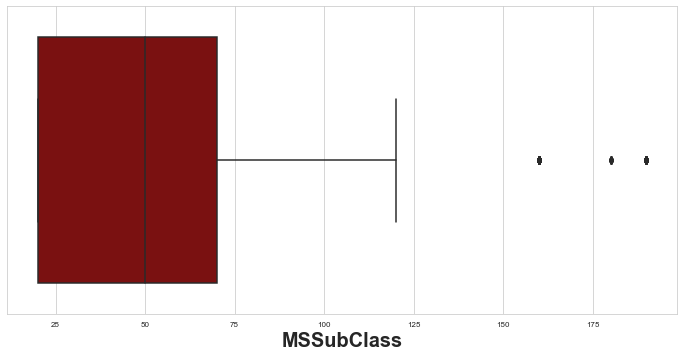

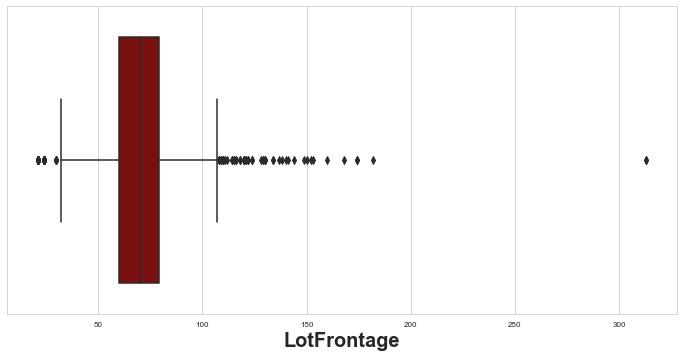

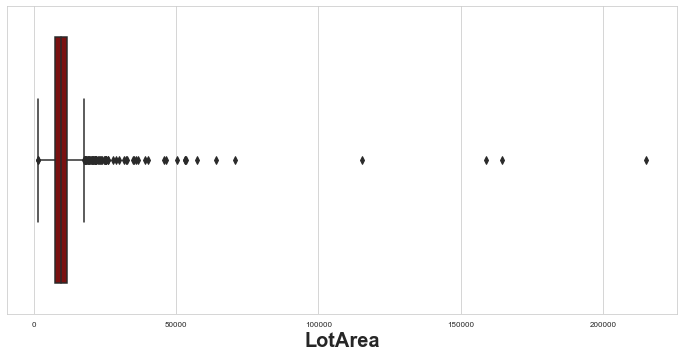

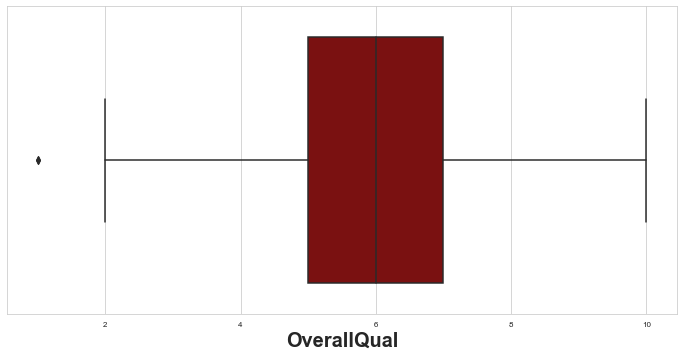

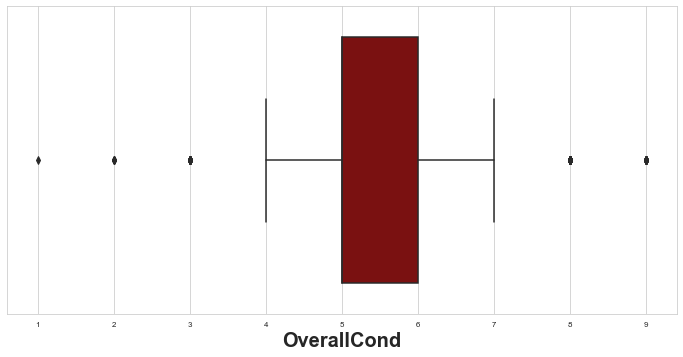

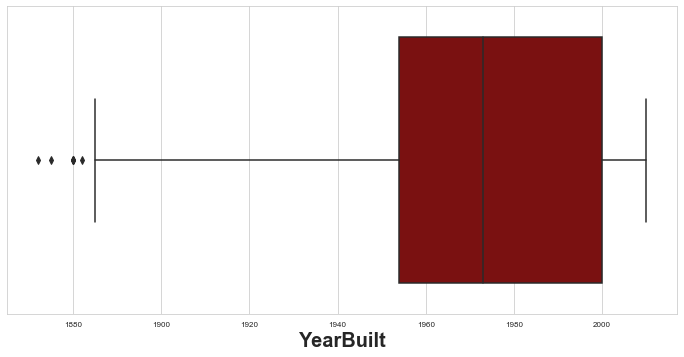

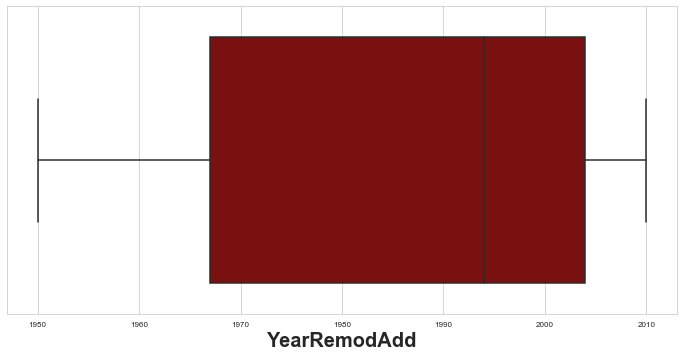

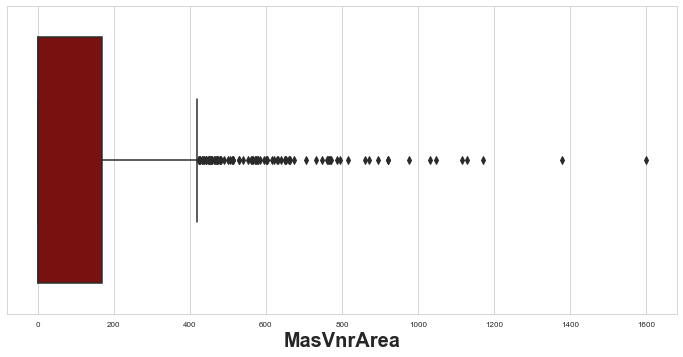

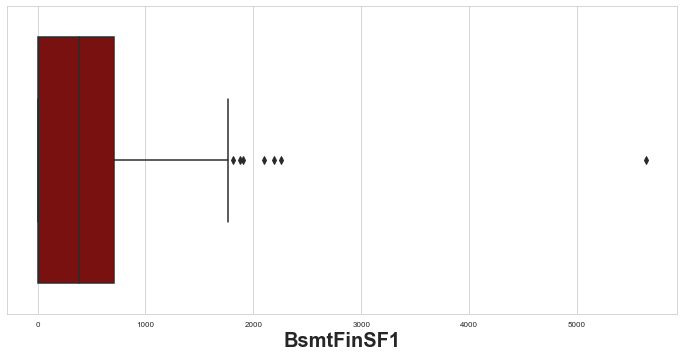

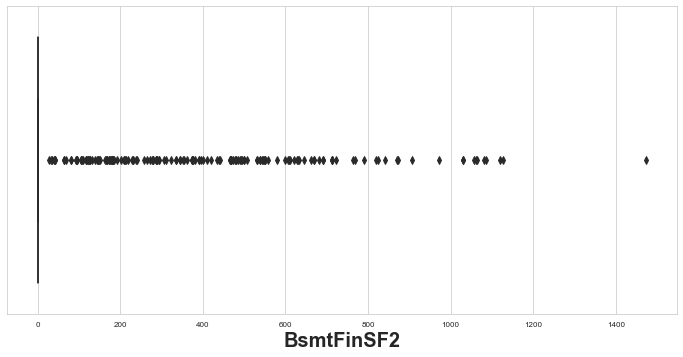

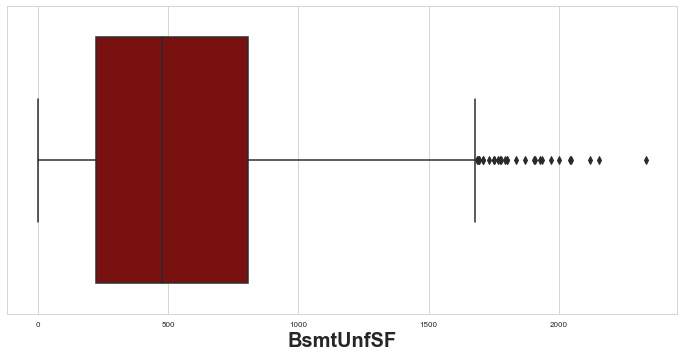

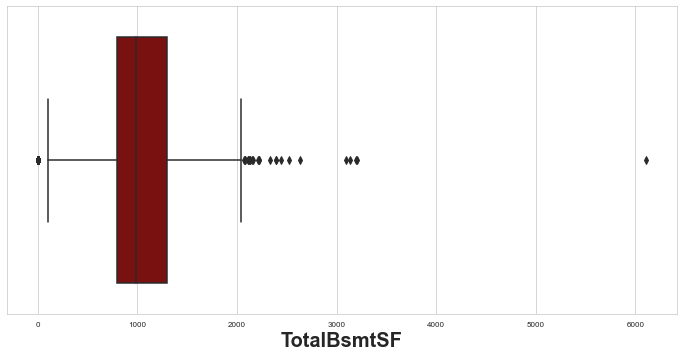

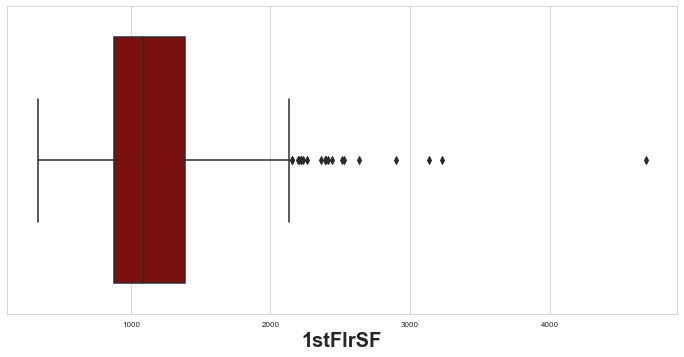

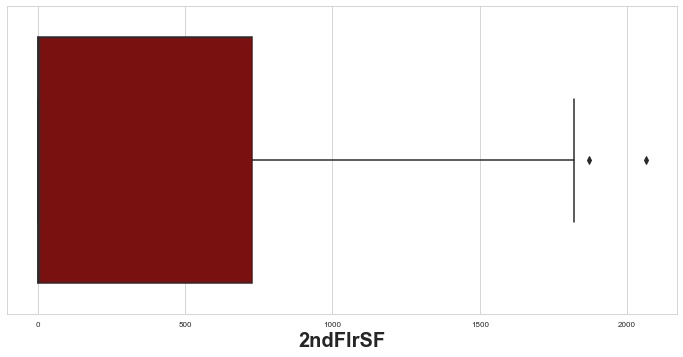

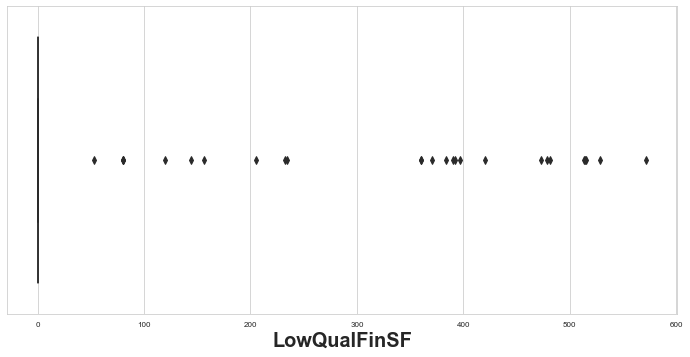

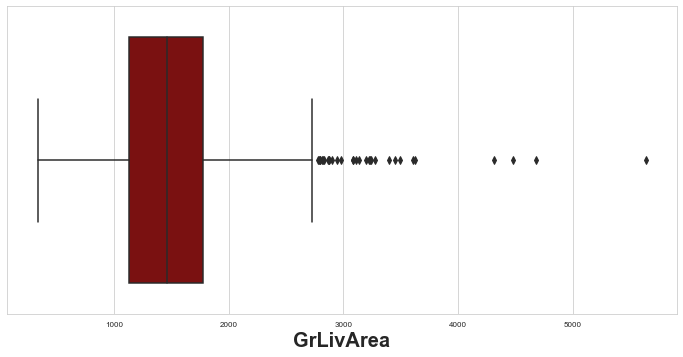

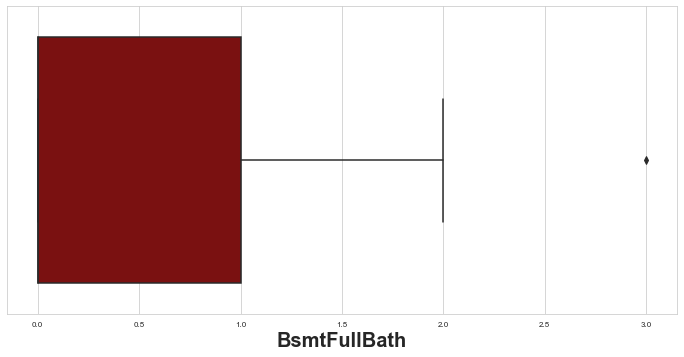

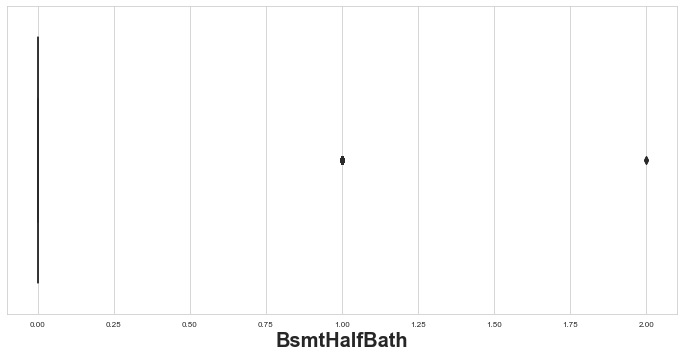

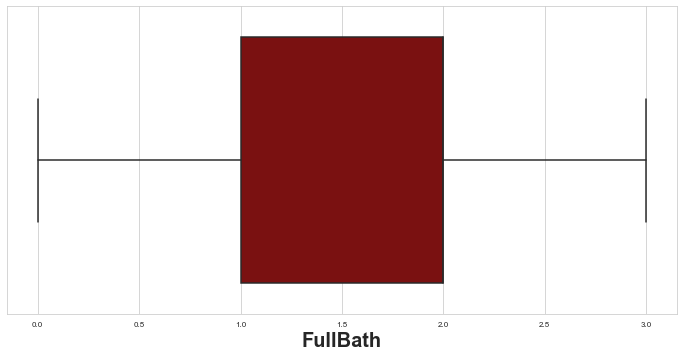

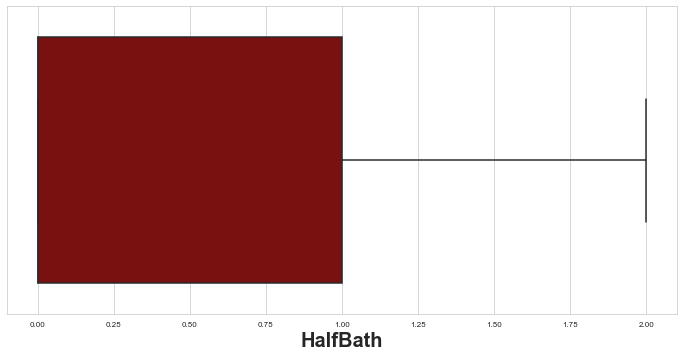

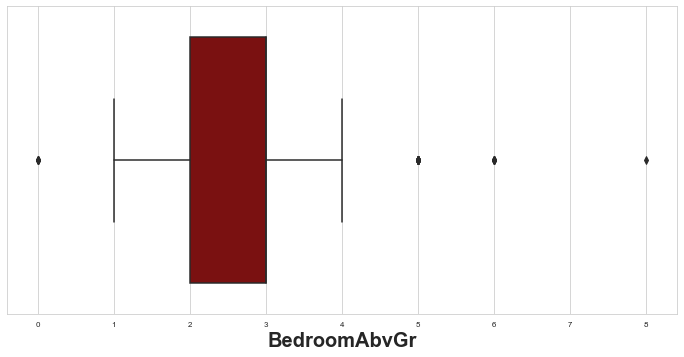

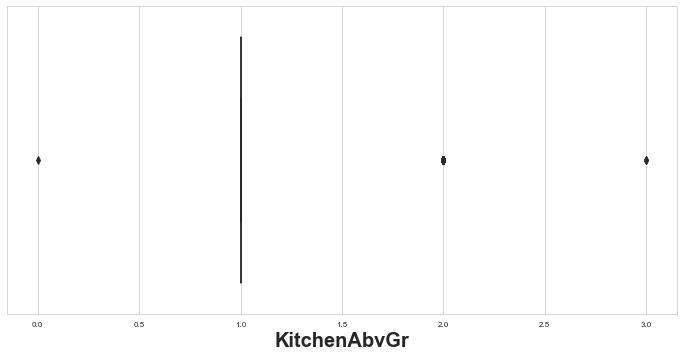

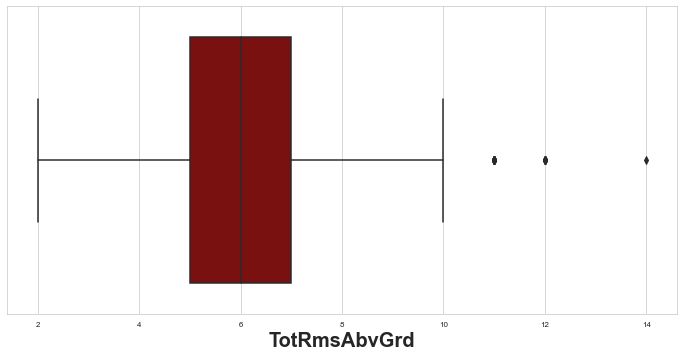

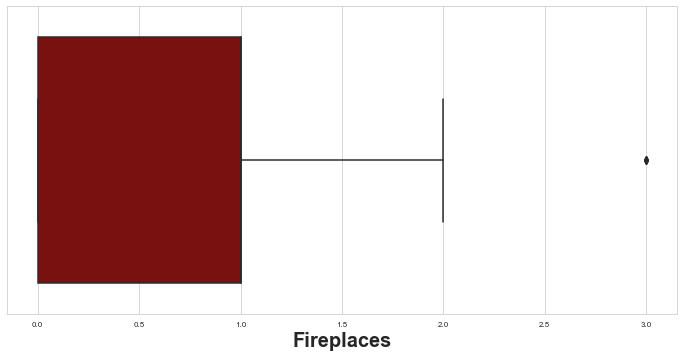

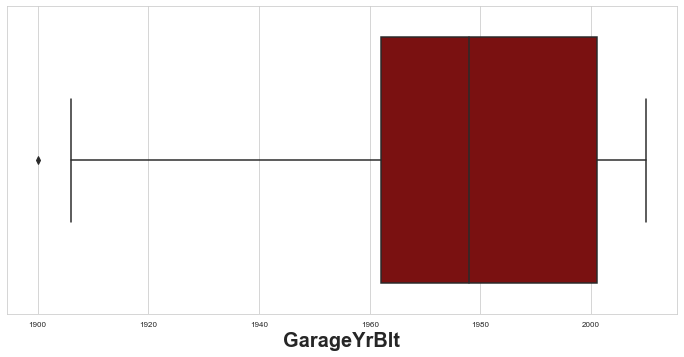

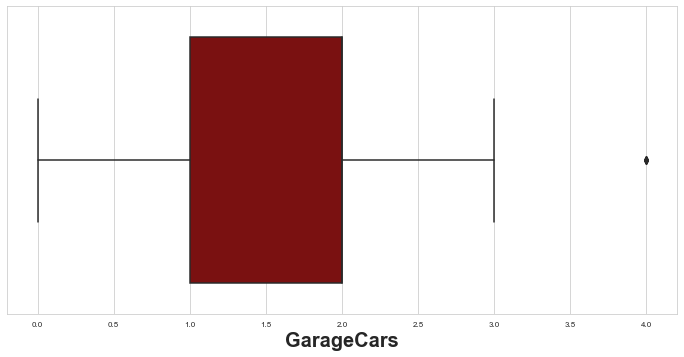

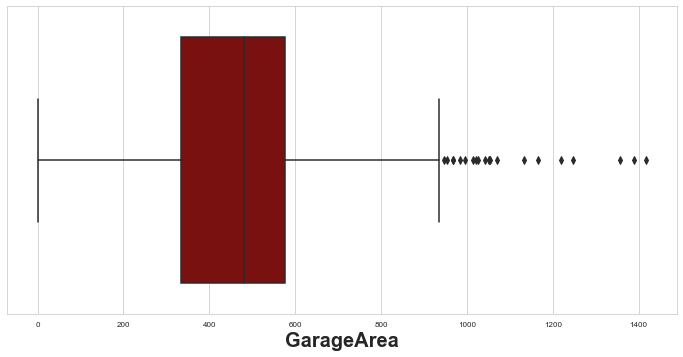

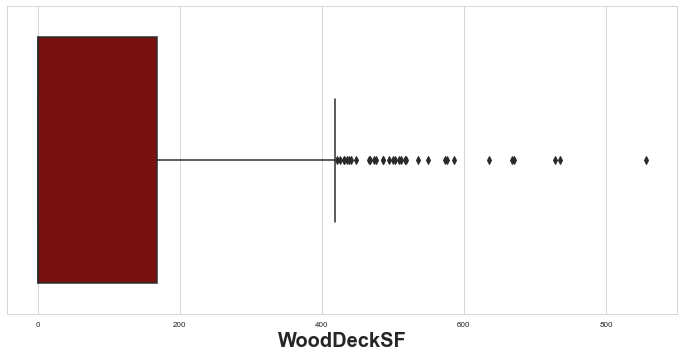

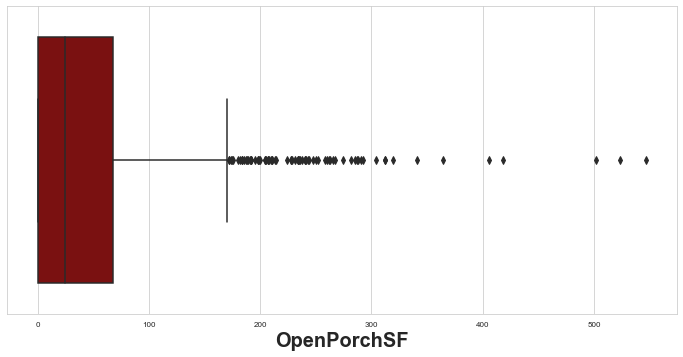

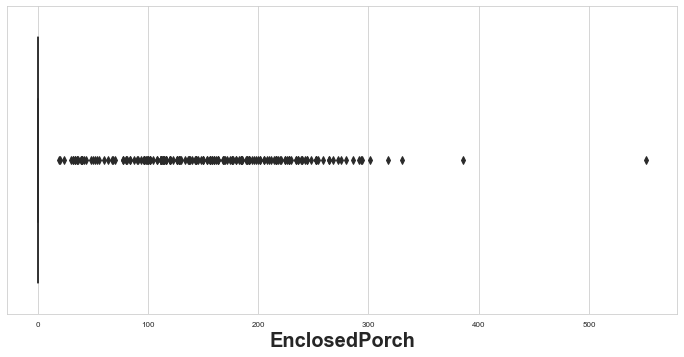

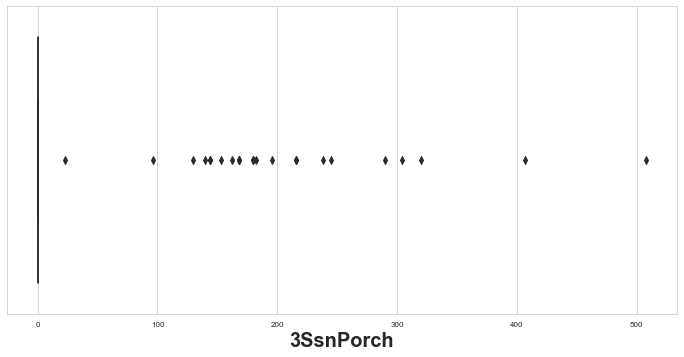

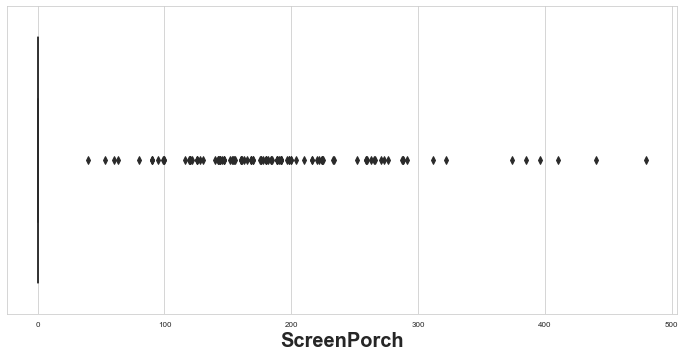

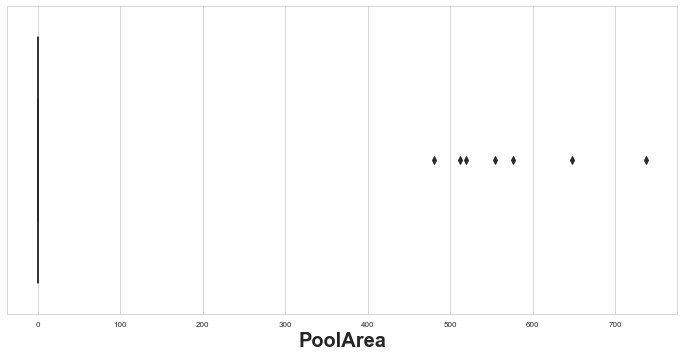

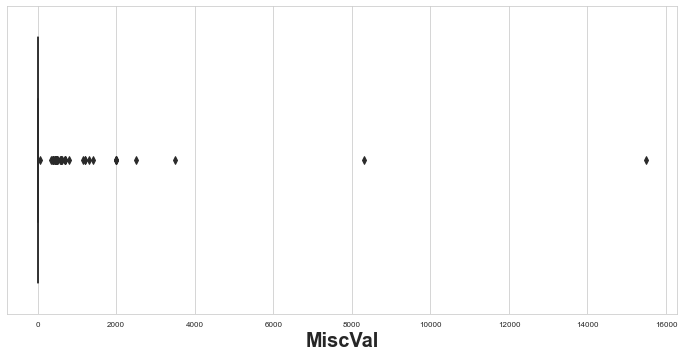

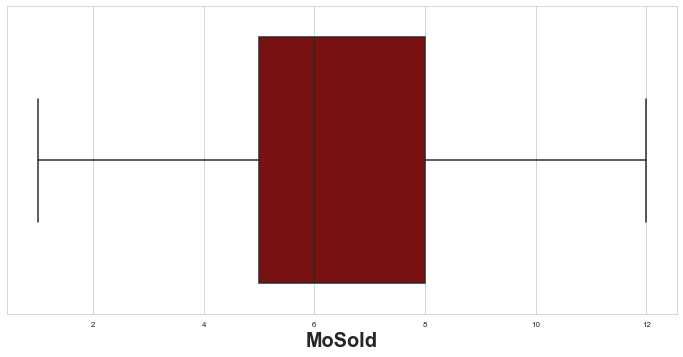

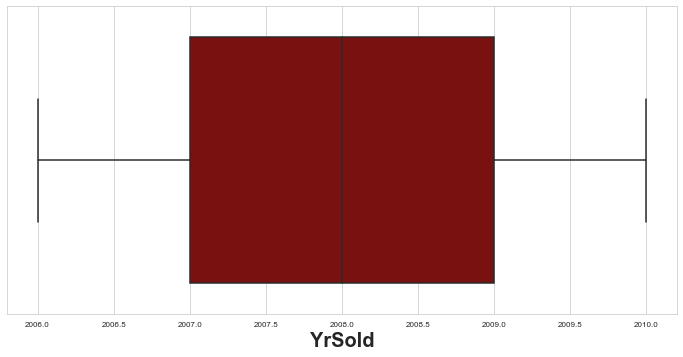

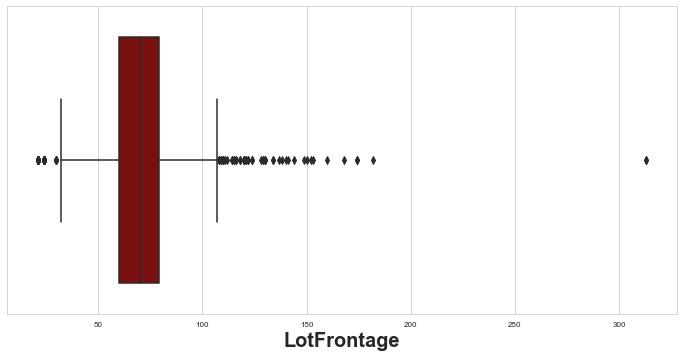

In [253]:
plotnumber = 1

for columns in cont_col:
    if plotnumber <= 37:
        plt.figure(figsize = (12,250))
        ax = plt.subplot(37,1, plotnumber)
        sns.boxplot(df[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20, fontweight = 'bold')
        plotnumber+=1
plt.show()

In above EDA & Visualization of continuous columns of the data (In Distribution Plot) we can observe almost all kind of data distribution, some of the column's data distribution are heavily right skewed like **LotArea**, **BsmtFinSF1**, **BsmtFinSF2**, **TotalBsmtSF**, **1stFlrSF**, **LowQualSF**, **GrLivArea**, **WoodDeckSF**, **OpenPorchSF**, **EnclosedPorch**, **3SsnPorch**, **ScreenPorch**, **PoolArea**, **MiscVal**, **LotFrontAge**, **MasVnrArea**. We also observed the left skewed data distribution in the column :- **YearBlt & GarageYrBlt.

## Removing Outliers

### New data frame having columns with outliers only

In [255]:
new_df = pd.DataFrame({})
new_df['MSSubClass'] = df['MSSubClass']
new_df['LotArea'] = df['LotArea']
new_df['OverallQual'] = df['OverallQual']
new_df['OverallCond'] = df['OverallCond']
new_df['YearBuilt'] = df['YearBuilt']
new_df['BsmtFinSF1'] = df['BsmtFinSF1']
new_df['BsmtFinSF2'] = df['BsmtFinSF2']
new_df['BsmtUnfSF'] = df['BsmtUnfSF']
new_df['TotalBsmtSF'] = df['TotalBsmtSF']
new_df['1stFlrSF'] = df['1stFlrSF']
new_df['2ndFlrSF'] = df['2ndFlrSF']
new_df['LowQualFinSF'] = df['LowQualFinSF']
new_df['GrLivArea'] = df['GrLivArea']
new_df['BsmtFullBath'] = df['BsmtFullBath']
new_df['BedroomAbvGr'] = df['BedroomAbvGr']
new_df['TotRmsAbvGrd'] = df['TotRmsAbvGrd']
new_df['Fireplaces'] = df['Fireplaces']
new_df['GarageCars'] = df['GarageCars']
new_df['GarageArea'] = df['GarageArea']
new_df['WoodDeckSF'] = df['WoodDeckSF']
new_df['OpenPorchSF'] = df['OpenPorchSF']
new_df['EnclosedPorch'] = df['EnclosedPorch']
new_df['3SsnPorch'] = df['3SsnPorch']
new_df['ScreenPorch'] = df['ScreenPorch']
new_df['PoolArea'] = df['PoolArea']
new_df['MiscVal'] = df['MiscVal']
new_df['LotFrontage'] = df['LotFrontage']
new_df['MasVnrArea'] = df['MasVnrArea']
new_df['GarageYrBlt'] = df['GarageYrBlt']
new_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,GarageYrBlt
0,60,8450,7,5,2003,706,0,150,856,856,854,0,1710,1,3,8,0,2,548,0,61,0,0,0,0,0,65.0,196.0,2003.0
1,20,9600,6,8,1976,978,0,284,1262,1262,0,0,1262,0,3,6,1,2,460,298,0,0,0,0,0,0,80.0,0.0,1976.0
2,60,11250,7,5,2001,486,0,434,920,920,866,0,1786,1,3,6,1,2,608,0,42,0,0,0,0,0,68.0,162.0,2001.0
3,70,9550,7,5,1915,216,0,540,756,961,756,0,1717,1,3,7,1,3,642,0,35,272,0,0,0,0,60.0,0.0,1998.0
4,60,14260,8,5,2000,655,0,490,1145,1145,1053,0,2198,1,4,9,1,3,836,192,84,0,0,0,0,0,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0,0,953,953,953,694,0,1647,0,3,7,1,2,460,0,40,0,0,0,0,0,62.0,0.0,1999.0
1456,20,13175,6,6,1978,790,163,589,1542,2073,0,0,2073,1,3,7,2,2,500,349,0,0,0,0,0,0,85.0,119.0,1978.0
1457,70,9042,7,9,1941,275,0,877,1152,1188,1152,0,2340,0,4,9,2,1,252,0,60,0,0,0,0,2500,66.0,0.0,1941.0
1458,20,9717,5,6,1950,49,1029,0,1078,1078,0,0,1078,1,2,5,0,1,240,366,0,112,0,0,0,0,68.0,0.0,1950.0


In [256]:
# importing stats from scipy
from scipy import stats
z = np.abs(stats.zscore(new_df))   # getting all the z score in variable z
z

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,GarageYrBlt
0,0.073375,0.207142,0.651479,0.517200,1.050994,0.575425,0.288653,0.944591,0.459303,0.793434,1.161852,0.120242,0.370333,1.107810,0.163779,0.912210,0.951226,0.311725,0.351000,0.752176,0.216503,0.359325,0.116339,0.270208,0.068692,0.087688,0.228969,0.507985,1.031931
1,0.872563,0.091886,0.071836,2.179628,0.156734,1.171992,0.288653,0.641228,0.466465,0.257140,0.795163,0.120242,0.482512,0.819964,0.163779,0.318683,0.600495,0.311725,0.060731,1.626195,0.704483,0.359325,0.116339,0.270208,0.068692,0.087688,0.452338,0.576950,0.084696
2,0.073375,0.073480,0.651479,0.517200,0.984752,0.092907,0.288653,0.301643,0.313369,0.627826,1.189351,0.120242,0.515013,1.107810,0.163779,0.318683,0.600495,0.311725,0.631726,0.752176,0.070361,0.359325,0.116339,0.270208,0.068692,0.087688,0.092708,0.319782,0.949218
3,0.309859,0.096897,0.651479,0.517200,1.863632,0.499274,0.288653,0.061670,0.687324,0.521734,0.937276,0.120242,0.383659,1.107810,0.163779,0.296763,0.600495,1.650307,0.790804,0.752176,0.176048,4.092524,0.116339,0.270208,0.068692,0.087688,0.456072,0.576950,0.825148
4,0.073375,0.375148,1.374795,0.517200,0.951632,0.463568,0.288653,0.174865,0.199680,0.045611,1.617877,0.120242,1.299326,1.107810,1.390023,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,0.359325,0.116339,0.270208,0.068692,0.087688,0.634020,1.360433,0.907862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,0.260560,0.071836,0.517200,0.918511,0.973018,0.288653,0.873321,0.238122,0.542435,0.795198,0.120242,0.250402,0.819964,0.163779,0.296763,0.600495,0.311725,0.060731,0.752176,0.100558,0.359325,0.116339,0.270208,0.068692,0.087688,0.365231,0.576950,0.866505
1456,0.872563,0.266407,0.071836,0.381743,0.222975,0.759659,0.722112,0.049262,1.104925,2.355701,0.795163,0.120242,1.061367,1.107810,0.163779,0.296763,2.152216,0.311725,0.126420,2.033231,0.704483,0.359325,0.116339,0.270208,0.068692,0.087688,0.679441,0.081761,0.001983
1457,0.309859,0.147810,0.651479,3.078570,1.002492,0.369871,0.288653,0.701265,0.215641,0.065656,1.844744,0.120242,1.569647,0.819964,1.390023,1.527656,2.152216,1.026858,1.033914,0.752176,0.201405,0.359325,0.116339,0.270208,0.068692,4.953112,0.183549,0.576950,1.532176
1458,0.872563,0.080160,0.795151,0.381743,0.704406,0.865548,6.092188,1.284176,0.046905,0.218982,0.795163,0.120242,0.832788,1.107810,1.062465,0.934130,0.951226,1.026858,1.090059,2.168910,0.704483,1.473789,0.116339,0.270208,0.068692,0.087688,0.092708,0.576950,1.159967


In [259]:
index = (np.where(z > 3)[0])            # getting all the indexes having z score greater than 3 in variable (index)
df = df.drop(df.index[index])     # dropping the whole rows of indexes from main data set where z score is greater than 3
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,GdPrv,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,MnPrv,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,GdPrv,0,9,2008,WD,Normal
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,GdPrv,0,12,2008,WD,Normal
6,20,RL,75.0,10084,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,MnPrv,0,8,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,RM,35.0,3675,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,TA,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,MnPrv,0,5,2006,WD,Normal
1453,20,RL,90.0,17217,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,TA,Detchd,1965.0,Unf,0,0,TA,Fa,Y,36,56,0,0,0,0,MnPrv,0,7,2006,WD,Abnorml
1454,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,Gd,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,MnPrv,0,10,2009,WD,Normal
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,GdPrv,0,8,2007,WD,Normal


In [260]:
# dropping the whole rows of indexes from new_df where z score is greater than 3
new_df = new_df.drop(new_df.index[index])
new_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,GarageYrBlt
0,60,8450,7,5,2003,706,0,150,856,856,854,0,1710,1,3,8,0,2,548,0,61,0,0,0,0,0,65.0,196.0,2003.0
1,20,9600,6,8,1976,978,0,284,1262,1262,0,0,1262,0,3,6,1,2,460,298,0,0,0,0,0,0,80.0,0.0,1976.0
2,60,11250,7,5,2001,486,0,434,920,920,866,0,1786,1,3,6,1,2,608,0,42,0,0,0,0,0,68.0,162.0,2001.0
4,60,14260,8,5,2000,655,0,490,1145,1145,1053,0,2198,1,4,9,1,3,836,192,84,0,0,0,0,0,84.0,350.0,2000.0
6,20,10084,8,5,2004,1369,0,317,1686,1694,0,0,1694,1,3,7,1,2,636,255,57,0,0,0,0,0,75.0,186.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,3675,5,5,2005,547,0,0,547,1072,0,0,1072,1,2,5,0,2,525,0,28,0,0,0,0,0,35.0,80.0,2005.0
1453,20,17217,5,5,2006,0,0,1140,1140,1140,0,0,1140,0,3,6,0,0,0,36,56,0,0,0,0,0,90.0,0.0,1965.0
1454,20,7500,7,5,2004,410,0,811,1221,1221,0,0,1221,1,2,6,0,2,400,0,113,0,0,0,0,0,62.0,0.0,2004.0
1455,60,7917,6,5,1999,0,0,953,953,953,694,0,1647,0,3,7,1,2,460,0,40,0,0,0,0,0,62.0,0.0,1999.0


## Rechecking the data distribution & outliers by visualising

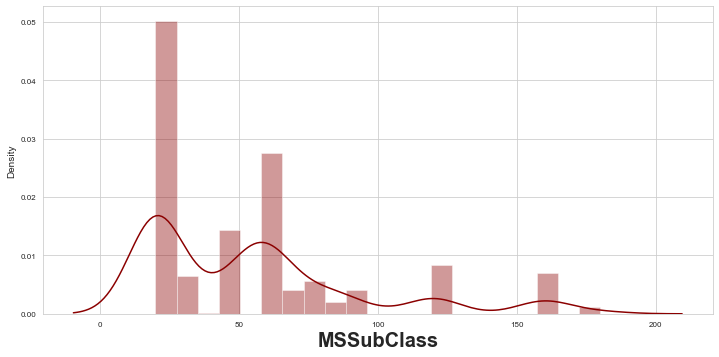

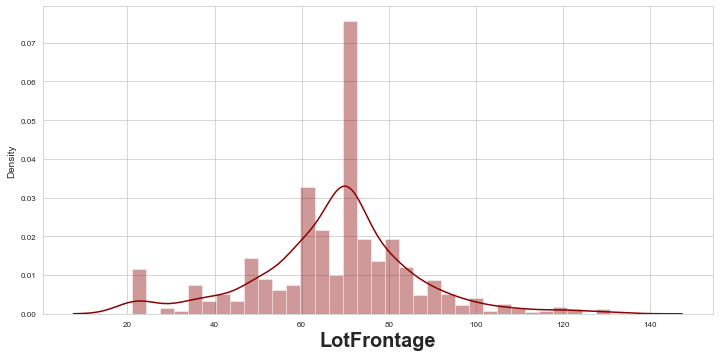

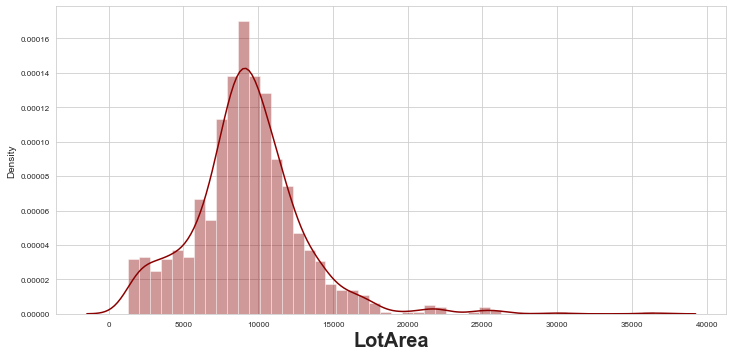

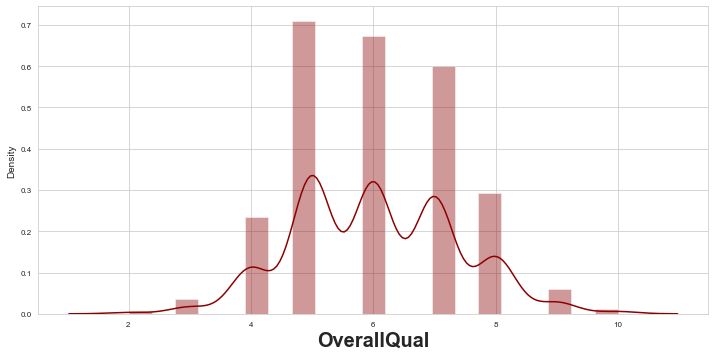

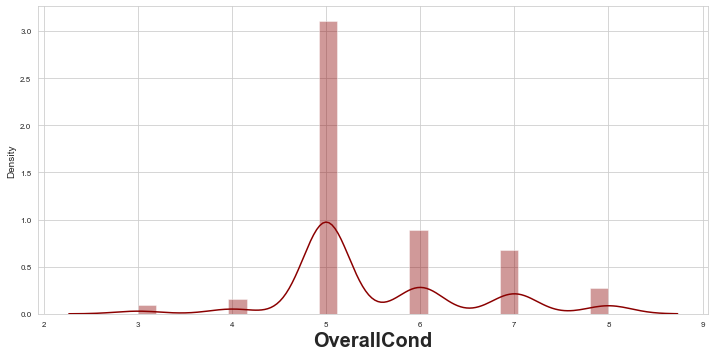

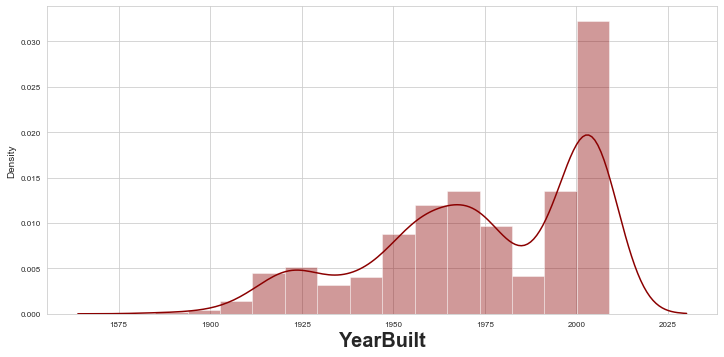

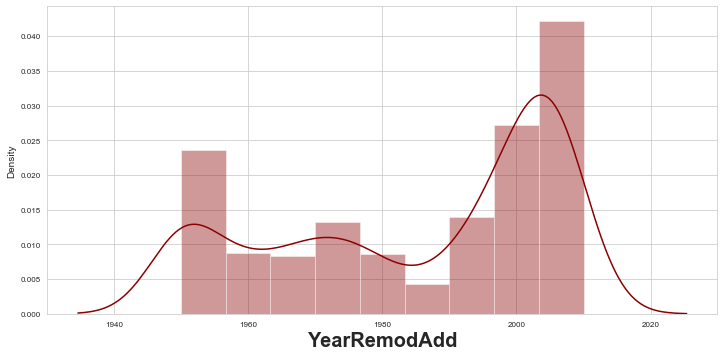

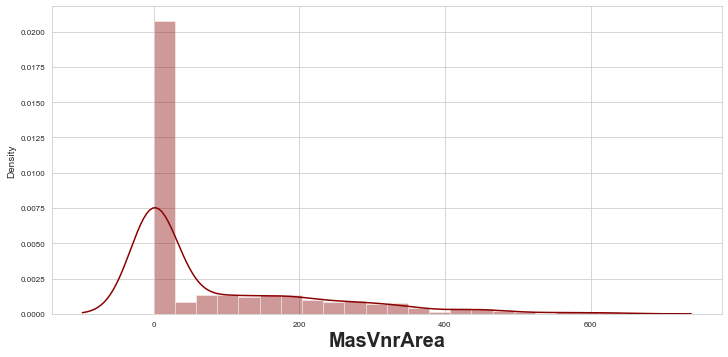

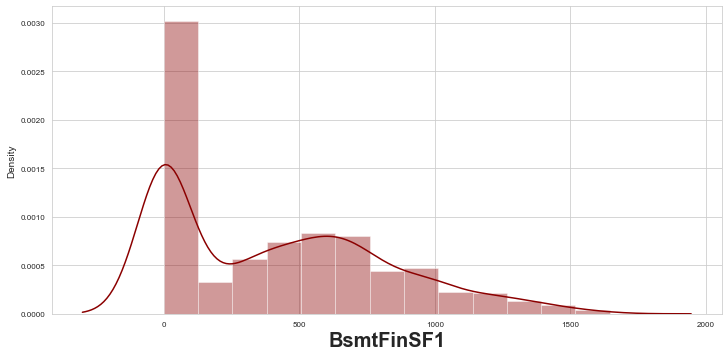

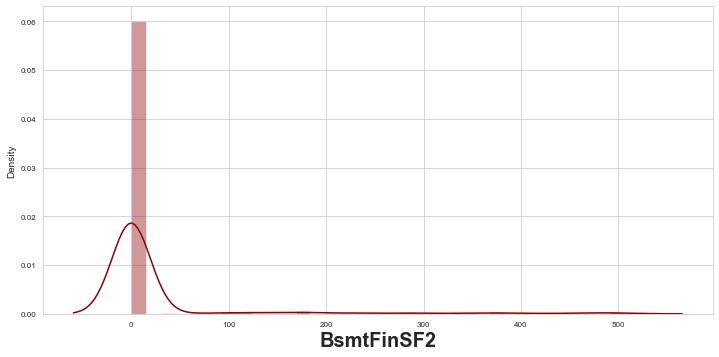

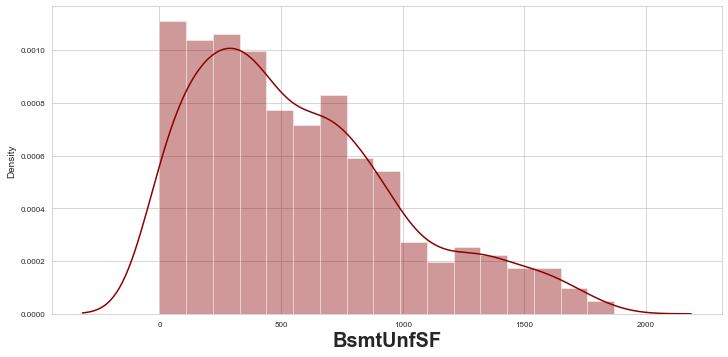

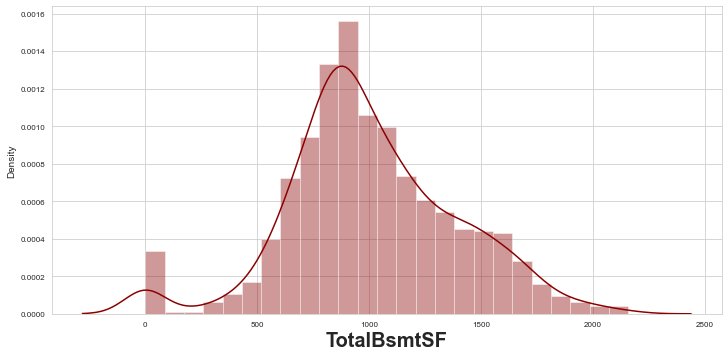

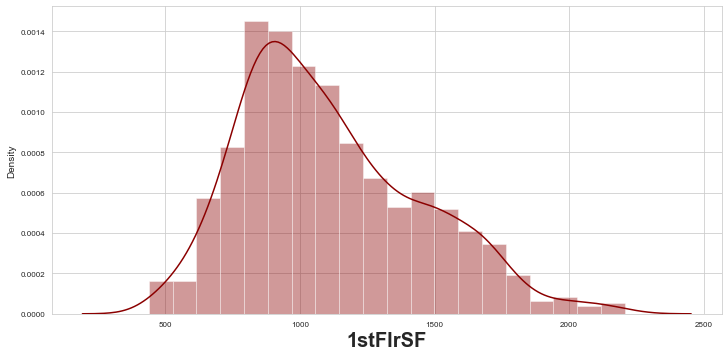

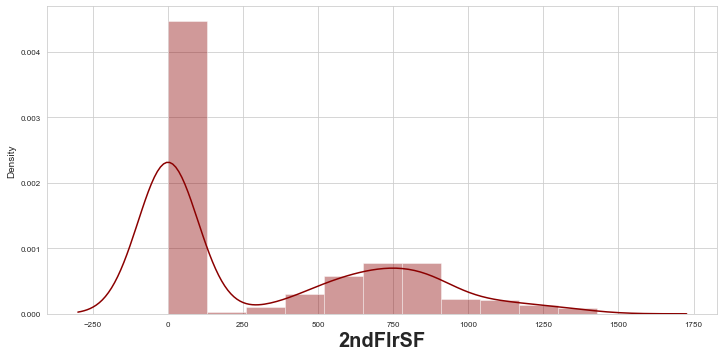

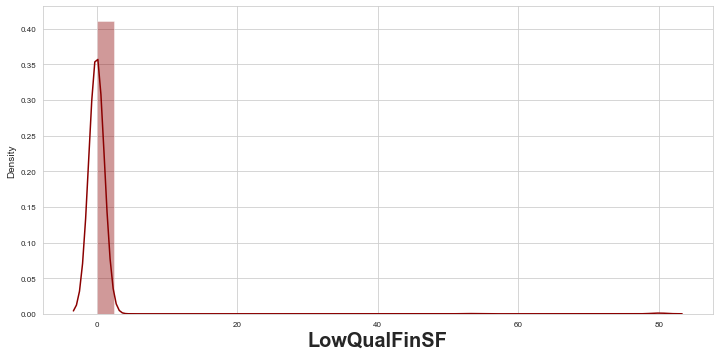

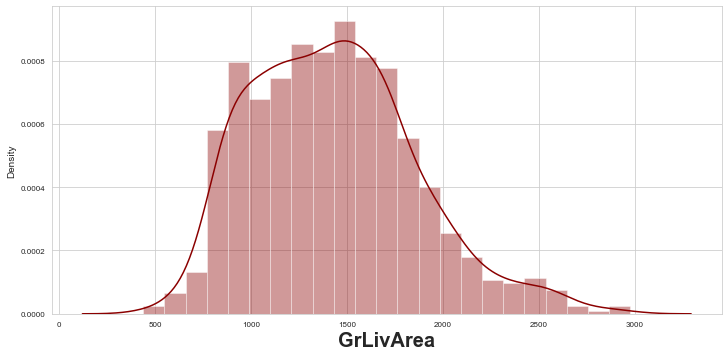

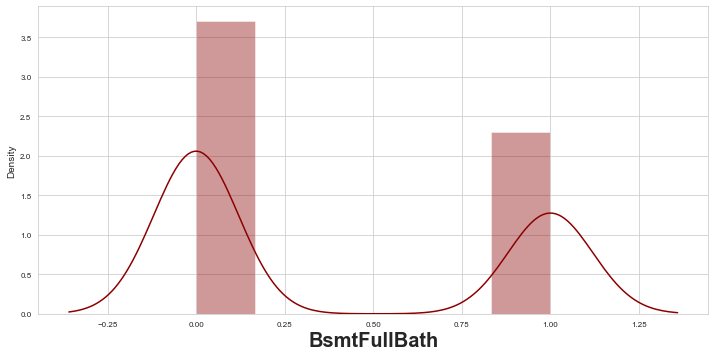

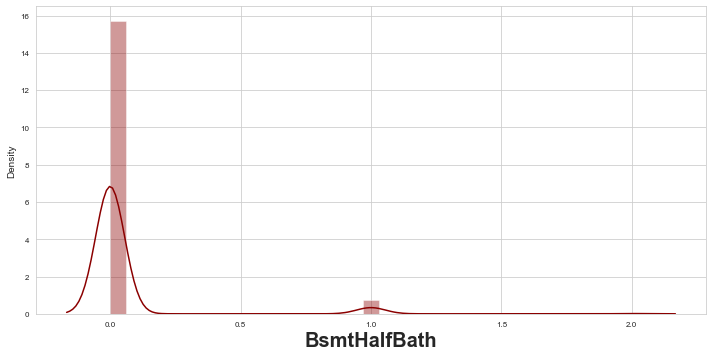

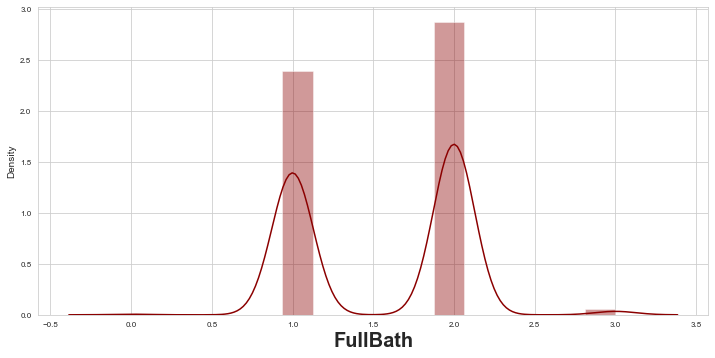

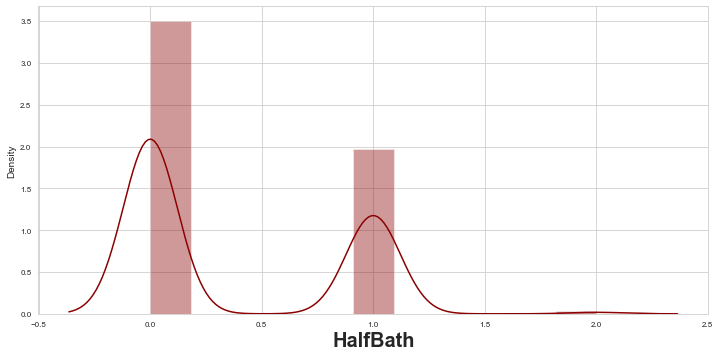

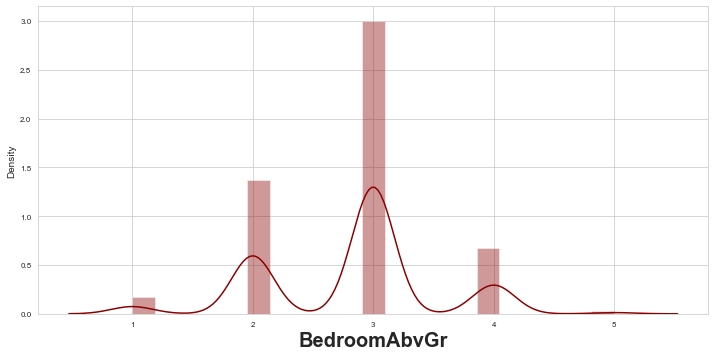

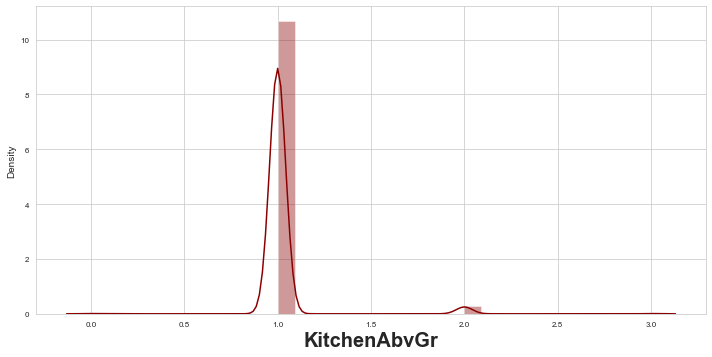

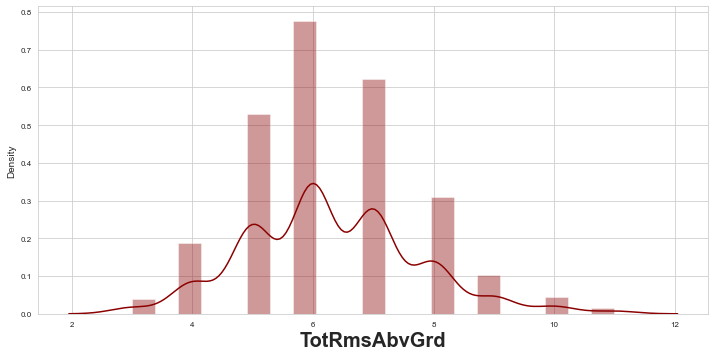

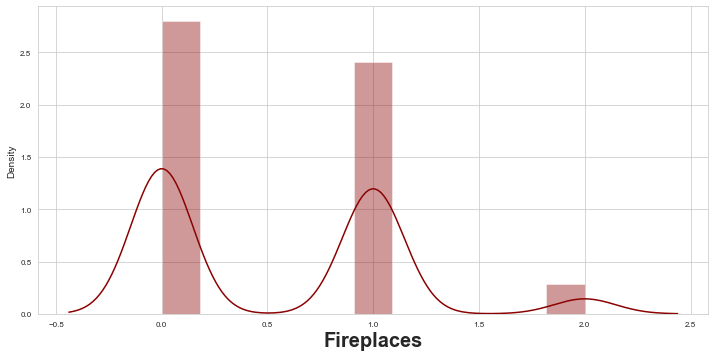

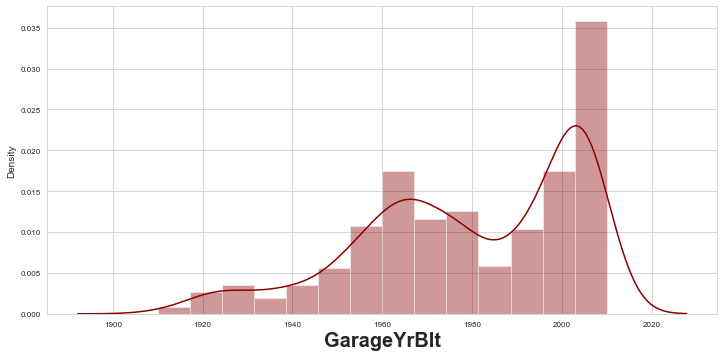

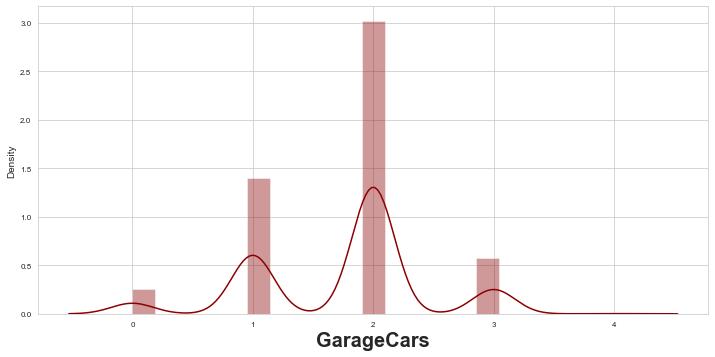

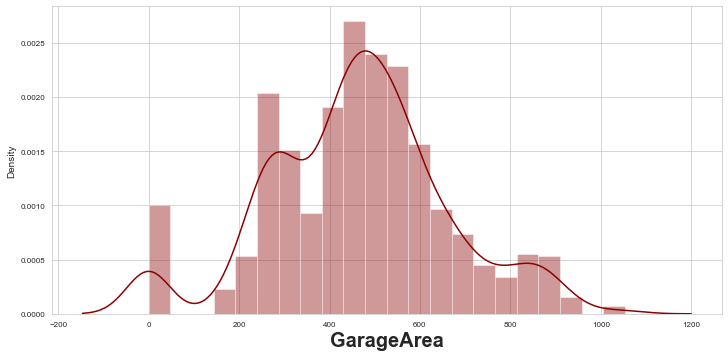

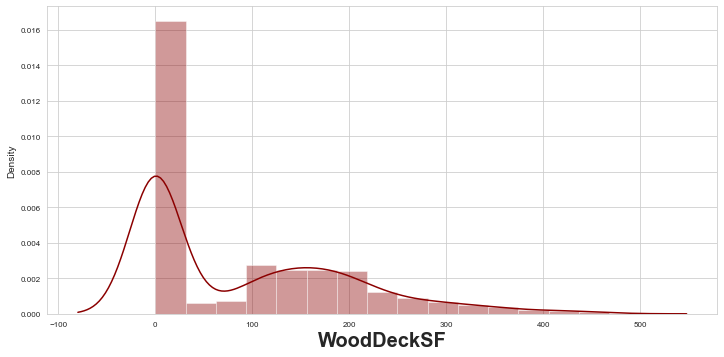

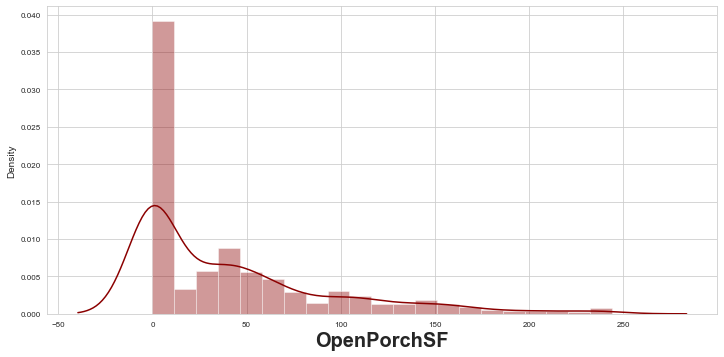

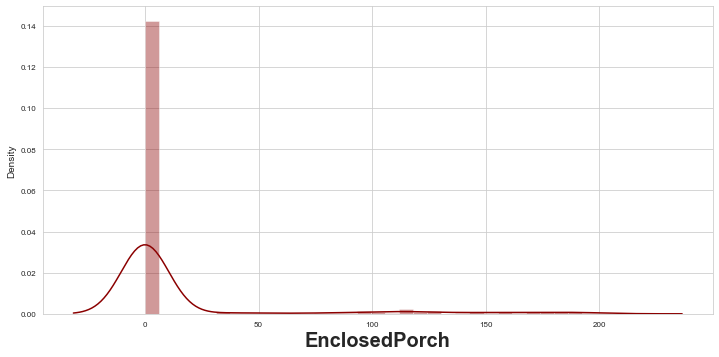

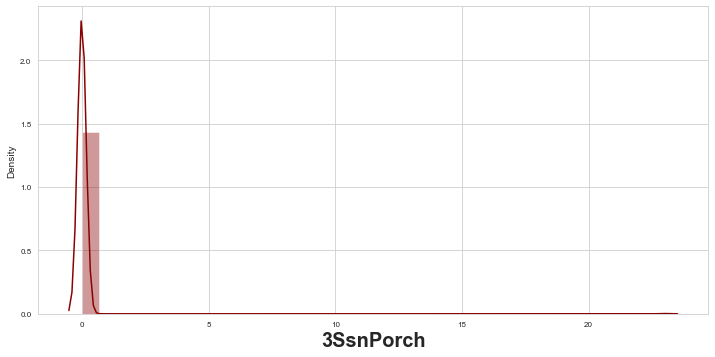

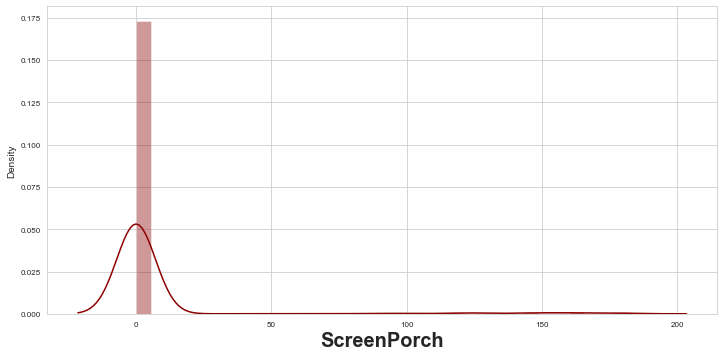

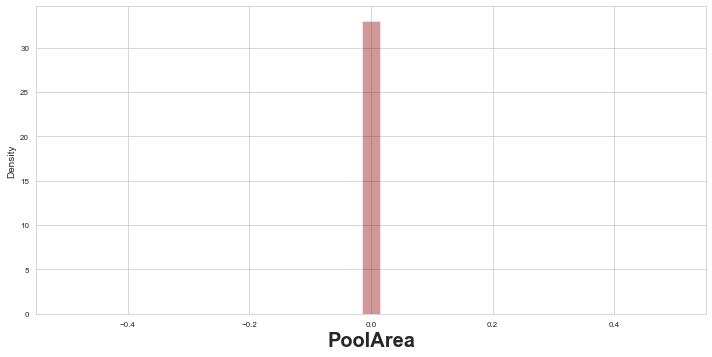

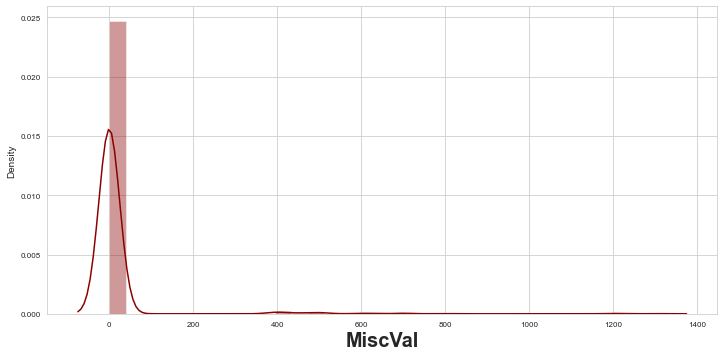

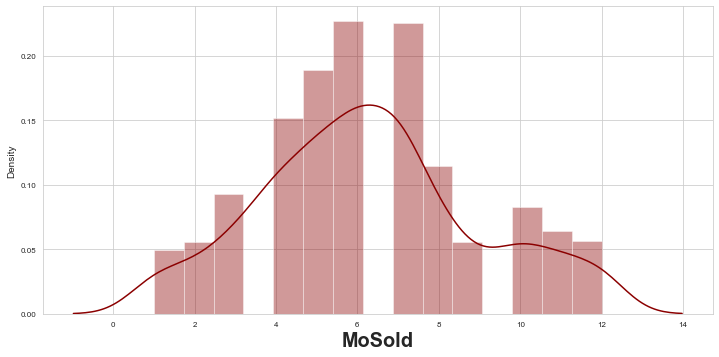

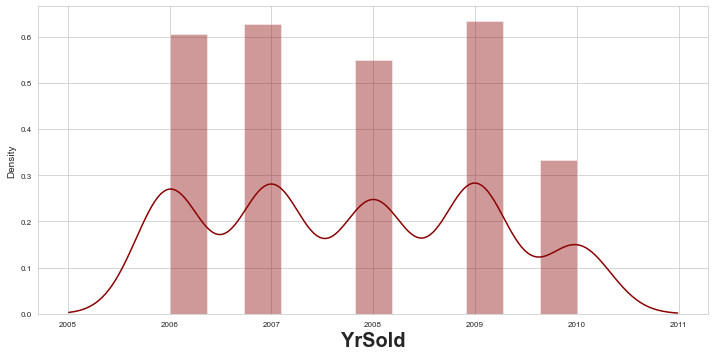

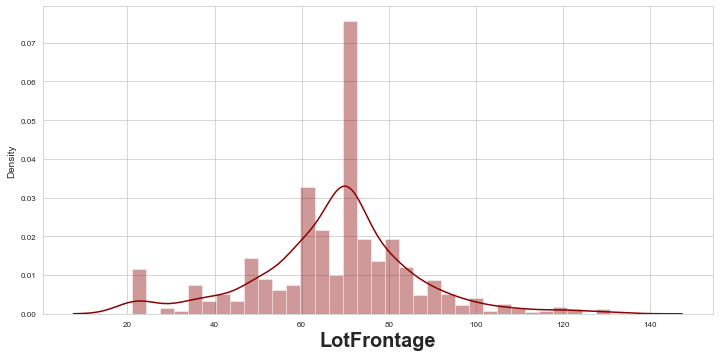

In [262]:
# ploting the distribution plot for all continuous column with for loop
plotnumber = 1

for columns in cont_col:
    if plotnumber <= 37:
        plt.figure(figsize = (12,250))
        ax = plt.subplot(37,1, plotnumber)
        sns.distplot(df[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20, fontweight = 'bold')
        plotnumber+=1
plt.show()

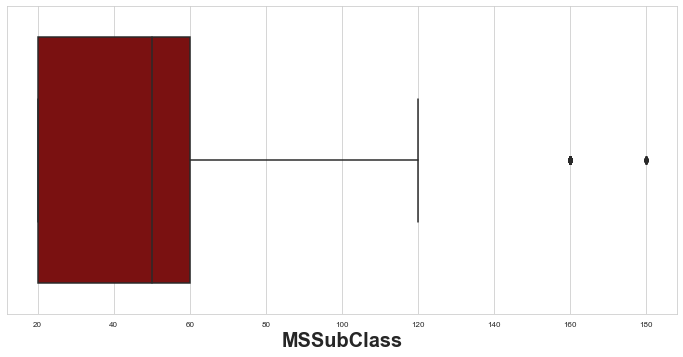

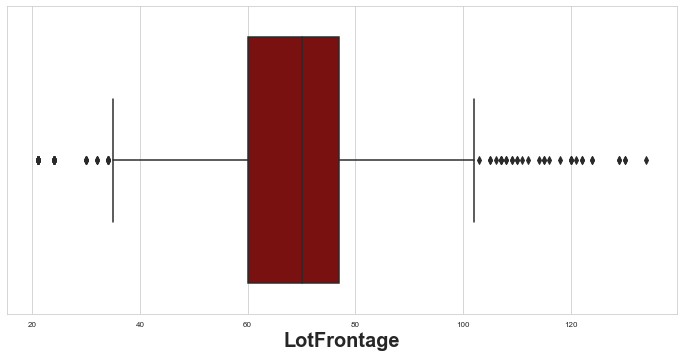

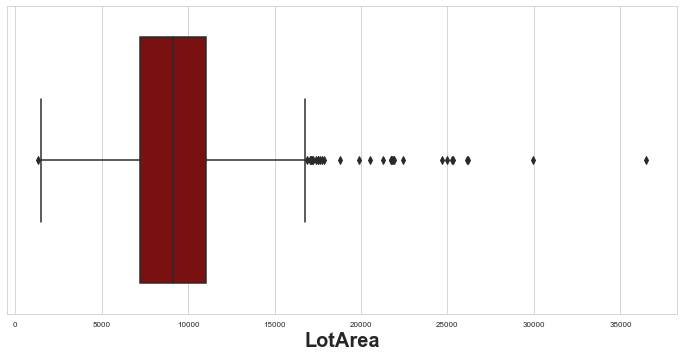

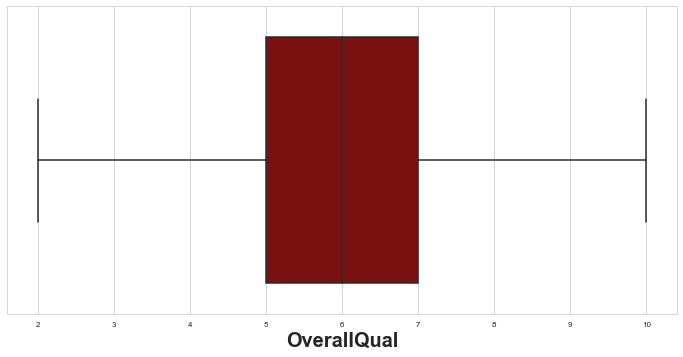

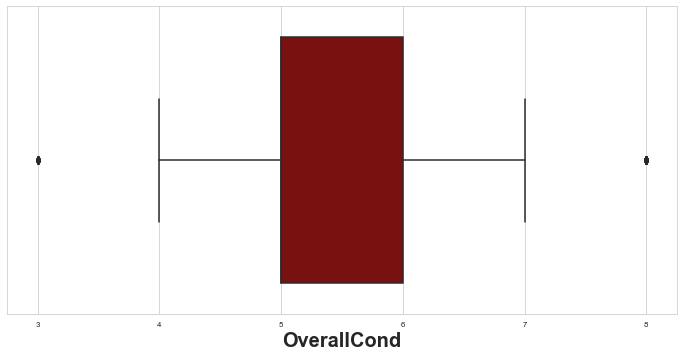

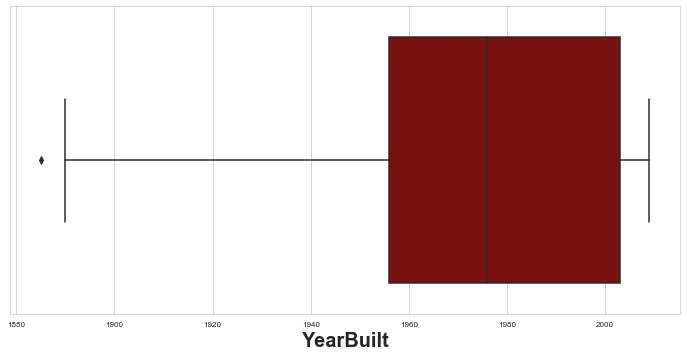

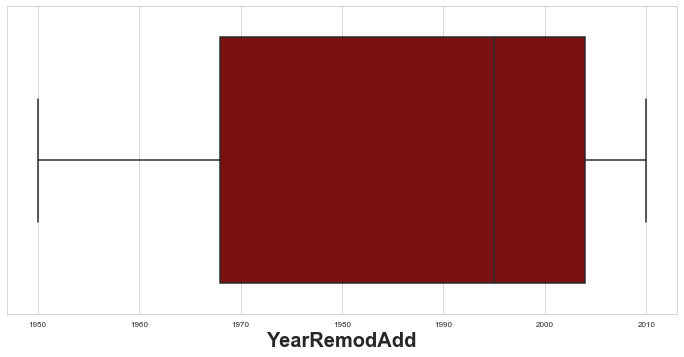

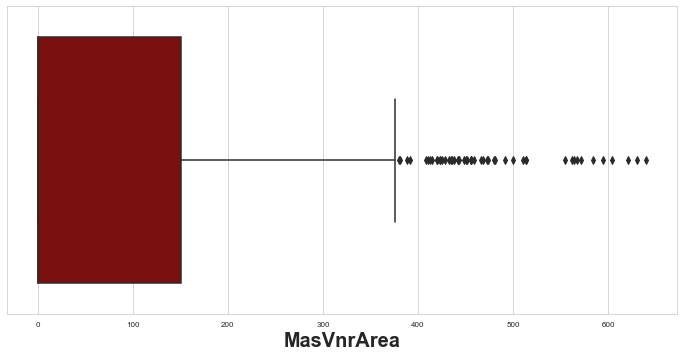

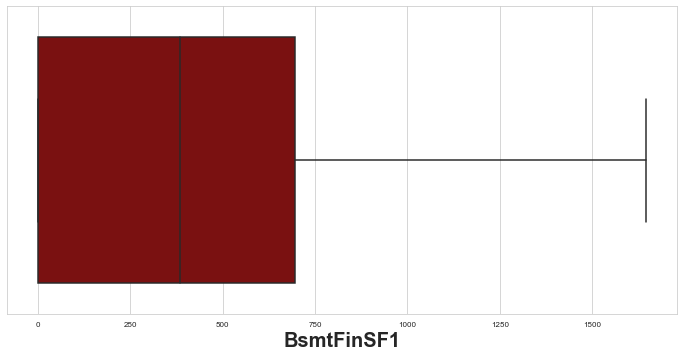

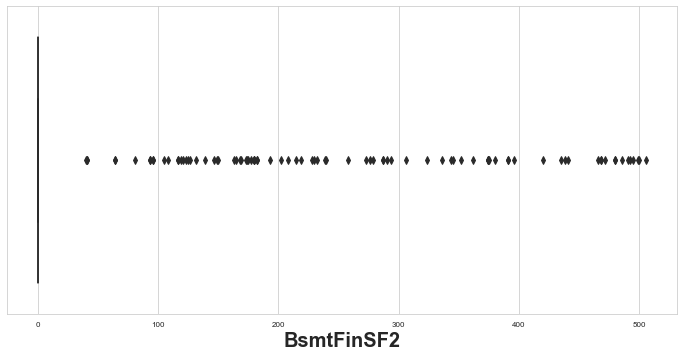

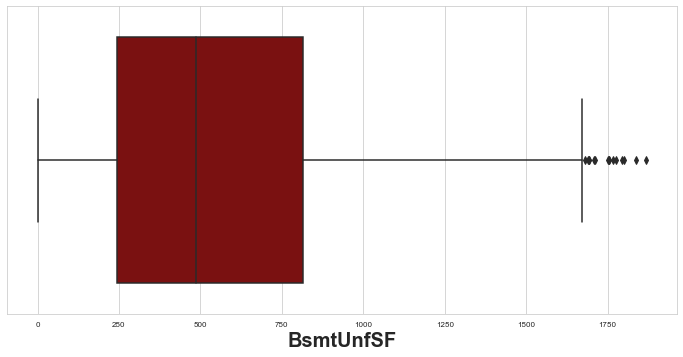

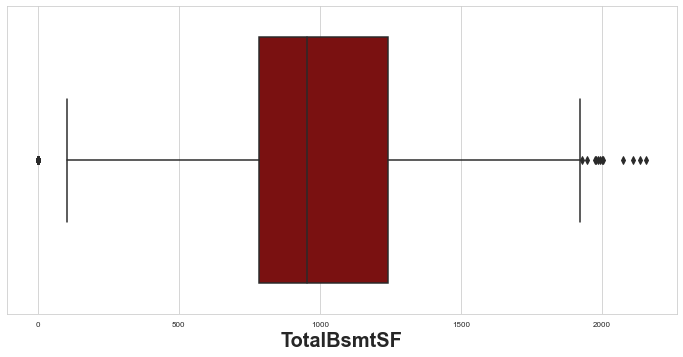

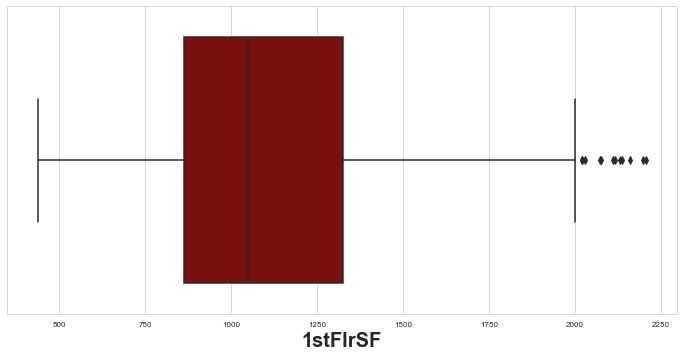

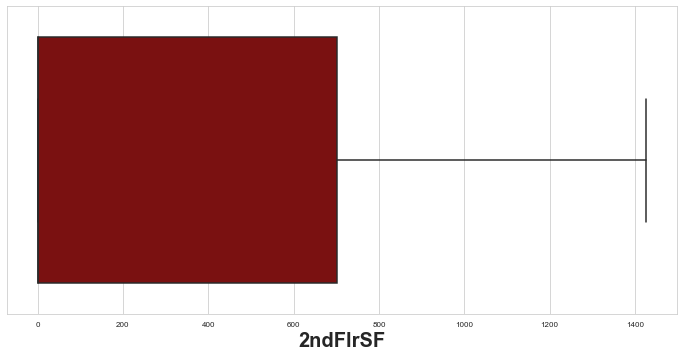

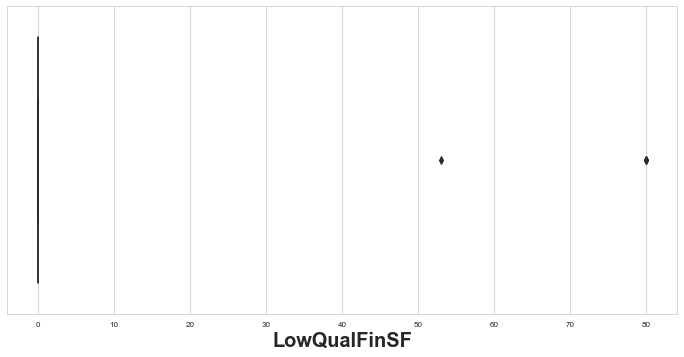

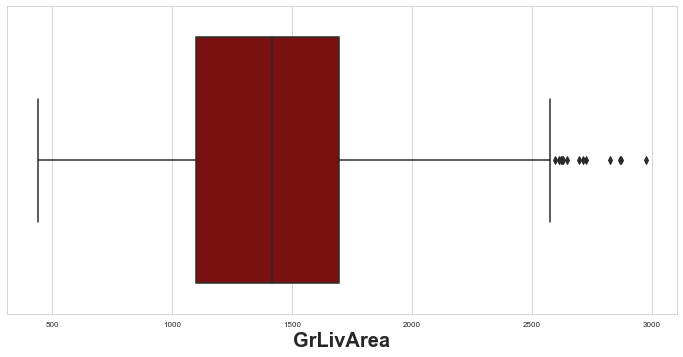

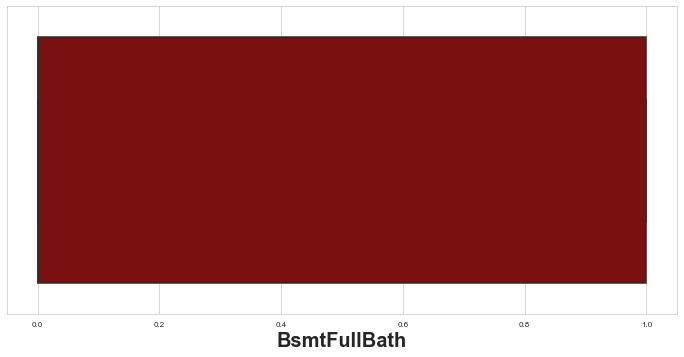

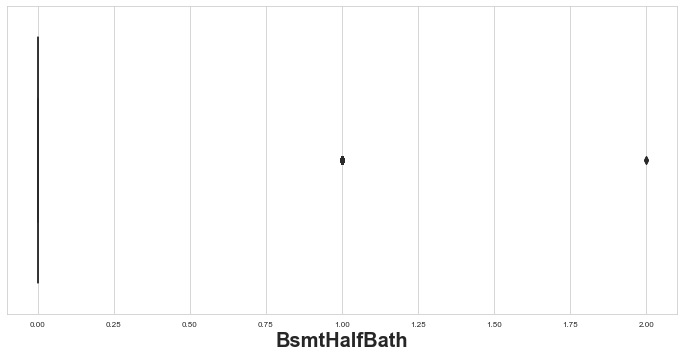

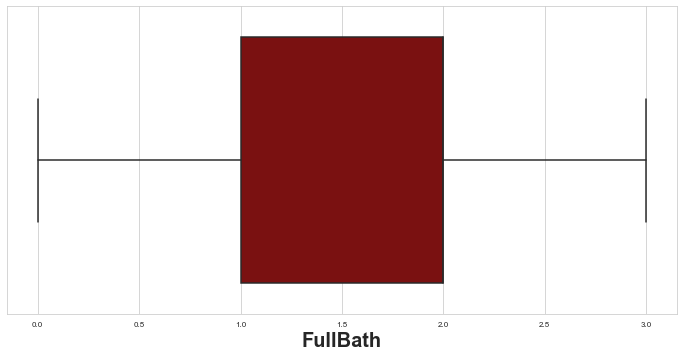

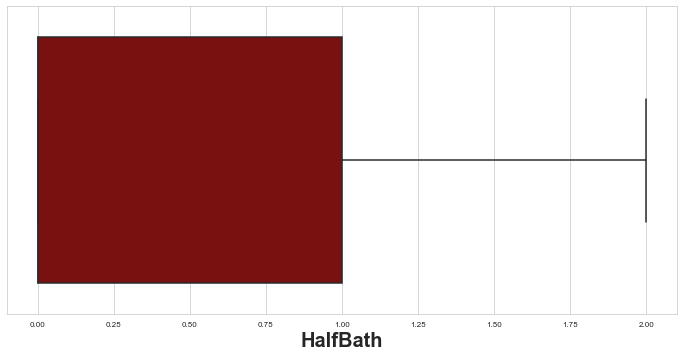

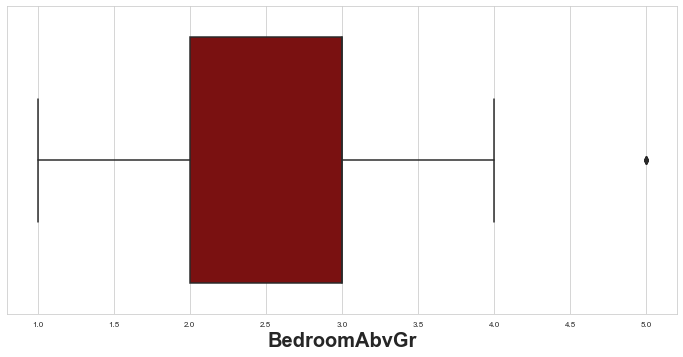

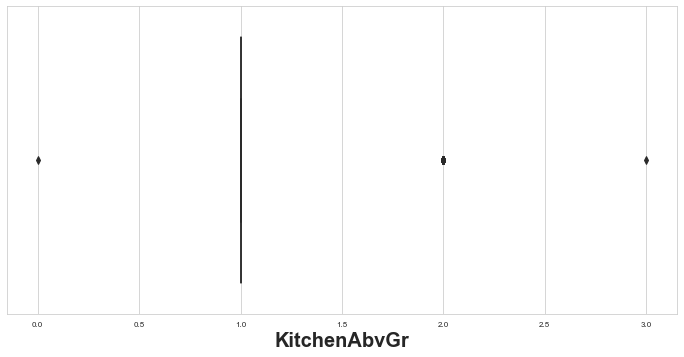

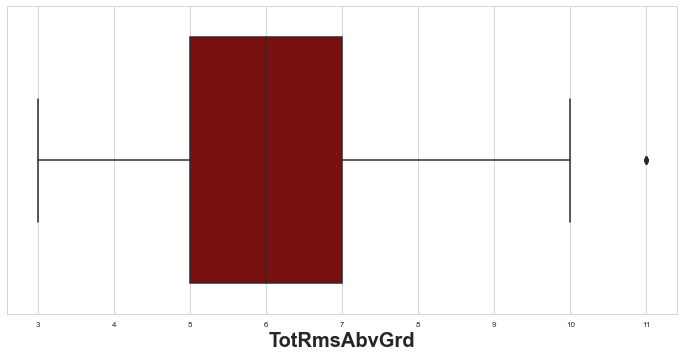

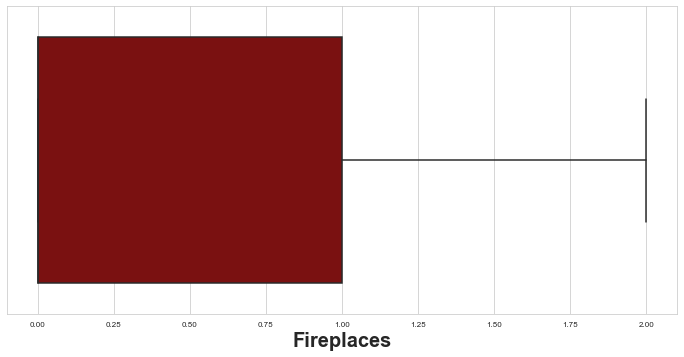

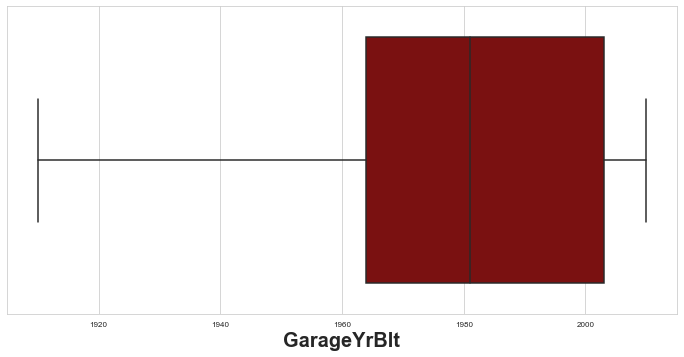

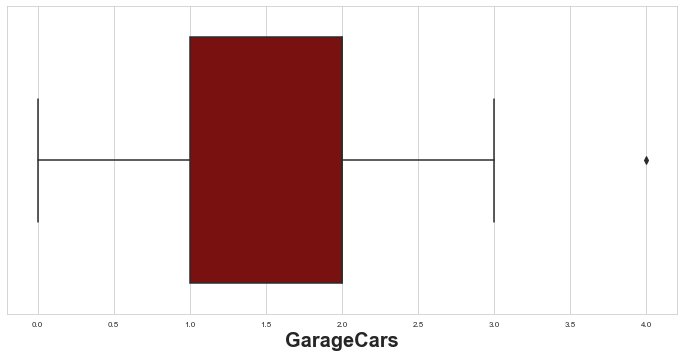

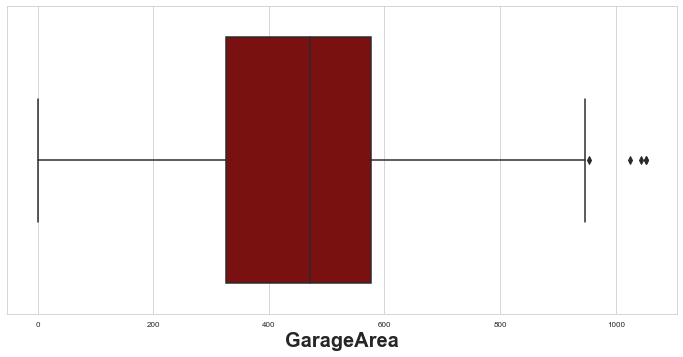

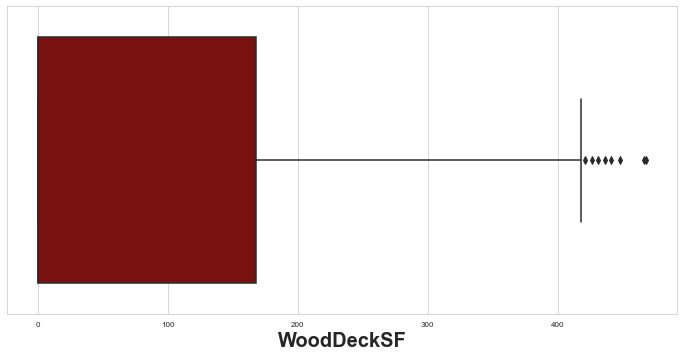

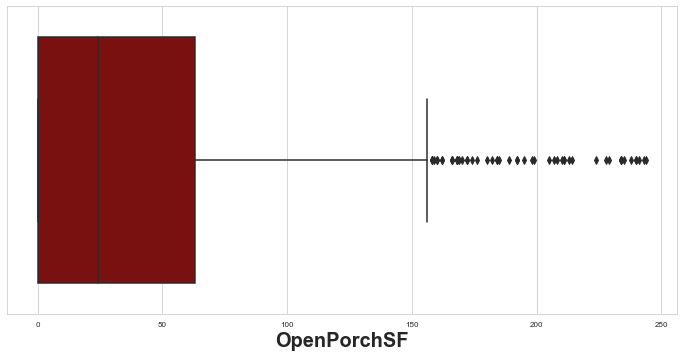

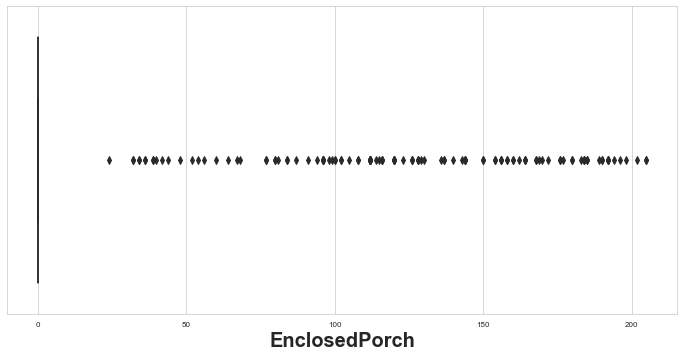

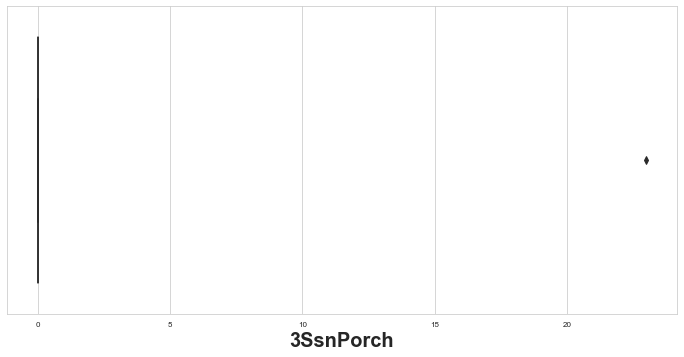

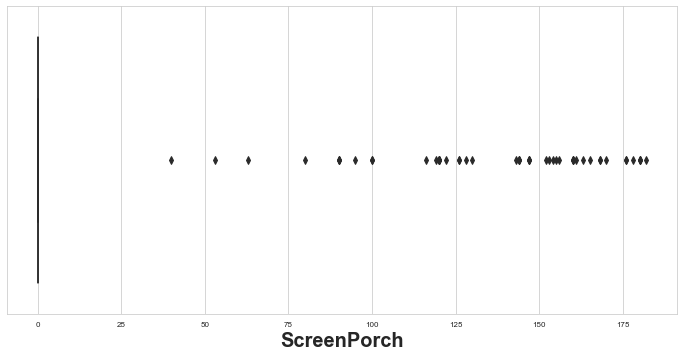

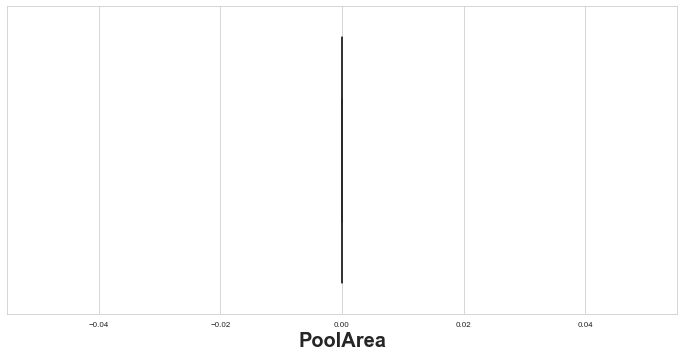

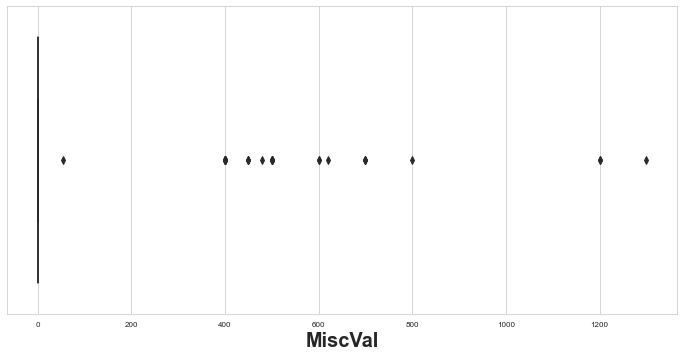

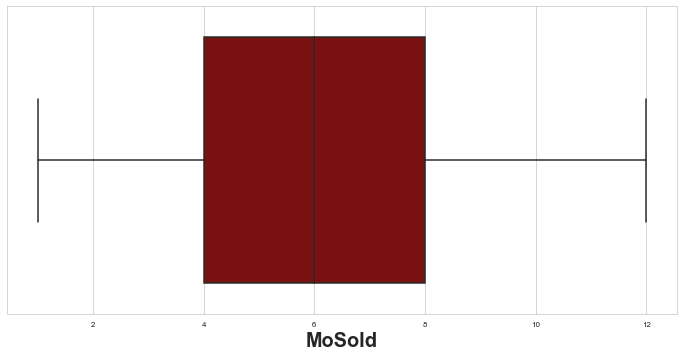

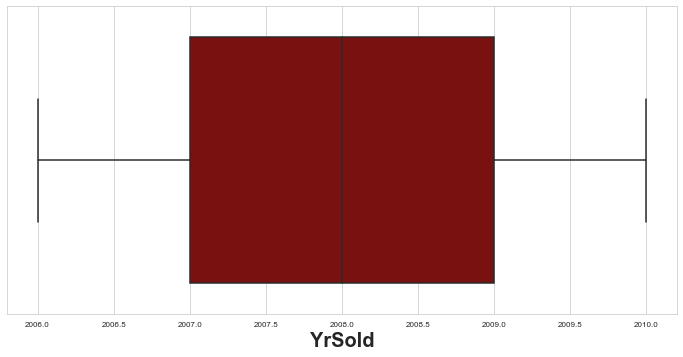

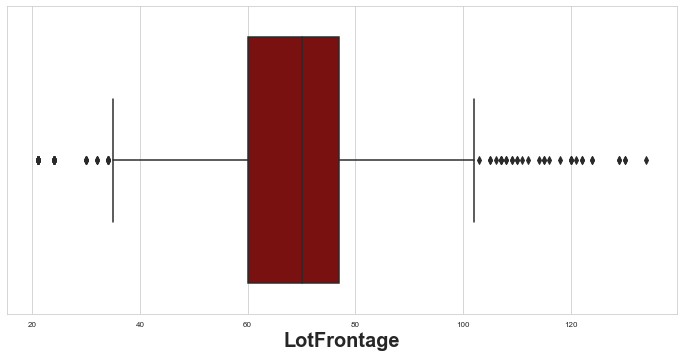

In [264]:
# ploting the boxplot plot for all continuous column with for loop
plotnumber = 1

for columns in cont_col:
    if plotnumber <= 37:
        plt.figure(figsize = (12,250))
        ax = plt.subplot(37,1, plotnumber)
        sns.boxplot(df[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20, fontweight = 'bold')
        plotnumber+=1
plt.show()

# Encoding

In [265]:
# list of categorical features
categorical_vars  = [feature for feature in df.columns if df[feature].dtypes =='O' ]
categorical_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']